In [1]:
import pandas as pd
import numpy as np
import string 
import spacy 
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
import re
from matplotlib import pyplot
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
#loading the dataset in variable df
df=pd.read_csv("FIFA22_official_data.csv",encoding='latin1')
df.head()

ID             Name  Age  \
0  212198  Bruno Fernandes   26   
1  209658      L. Goretzka   26   
2  176580       L. SuÃ¡rez   34   
3  192985     K. De Bruyne   30   
4  224334        M. AcuÃ±a   29   

                                              Photo Nationality  \
0  https://cdn.sofifa.com/players/212/198/22_60.png    Portugal   
1  https://cdn.sofifa.com/players/209/658/22_60.png     Germany   
2  https://cdn.sofifa.com/players/176/580/22_60.png     Uruguay   
3  https://cdn.sofifa.com/players/192/985/22_60.png     Belgium   
4  https://cdn.sofifa.com/players/224/334/22_60.png   Argentina   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.com/flags/pt.png       88         89   
1  https://cdn.sofifa.com/flags/de.png       87         88   
2  https://cdn.sofifa.com/flags/uy.png       88         88   
3  https://cdn.sofifa.com/flags/be.png       91         91   
4  https://cdn.sofifa.com/flags/ar.png       84         84   

                  Club                                Club Logo  ...  \
0    Manchester United   https://cdn.sofifa.com/teams/11/30.png  ...   
1   FC Bayern MÃ¼nchen   https://cdn.sofifa.com/teams/21/30.png  ...   
2  AtlÃ©tico de Madrid  https://cdn.sofifa.com/teams/240/30.png  ...   
3      Manchester City   https://cdn.sofifa.com/teams/10/30.png  ...   
4           Sevilla FC  https://cdn.sofifa.com/teams/481/30.png  ...   

  SlidingTackle GKDiving  GKHandling GKKicking  GKPositioning  GKReflexes  \
0          65.0     12.0        14.0      15.0            8.0        14.0   
1          77.0     13.0         8.0      15.0           11.0         9.0   
2          38.0     27.0        25.0      31.0           33.0        37.0   
3          53.0     15.0        13.0       5.0           10.0        13.0   
4          82.0      8.0        14.0      13.0           13.0        14.0   

   Best Position Best Overall Rating Release Clause DefensiveAwareness  
0            CAM                88.0      â¬206.9M               72.0  
1             CM                87.0      â¬160.4M               74.0  
2             ST                88.0       â¬91.2M               42.0  
3             CM                91.0      â¬232.2M               68.0  
4             LB                84.0       â¬77.7M               80.0  

[5 rows x 65 columns]

In [3]:
!pip install spacy

Defaulting to user installation because normal site-packages is not writeable


In [4]:
#dropping column that will not be used
df=df.drop(['ID','Photo','Flag','Club Logo', 'Value', 'Wage', 'Special','Work Rate','Body Type','Real Face',
                'Jersey Number','Joined','Loaned From','Contract Valid Until','GKDiving','GKHandling','GKKicking',
                'GKPositioning','GKReflexes','Marking','Release Clause'],axis=1)

Dropping few of the columns as they are not required

In [5]:
df.head()

Name  Age Nationality  Overall  Potential                 Club  \
0  Bruno Fernandes   26    Portugal       88         89    Manchester United   
1      L. Goretzka   26     Germany       87         88   FC Bayern MÃ¼nchen   
2       L. SuÃ¡rez   34     Uruguay       88         88  AtlÃ©tico de Madrid   
3     K. De Bruyne   30     Belgium       91         91      Manchester City   
4        M. AcuÃ±a   29   Argentina       84         84           Sevilla FC   

  Preferred Foot  International Reputation  Weak Foot  Skill Moves  ...  \
0          Right                       3.0        3.0          4.0  ...   
1          Right                       4.0        4.0          3.0  ...   
2          Right                       5.0        4.0          3.0  ...   
3          Right                       4.0        5.0          4.0  ...   
4           Left                       2.0        3.0          4.0  ...   

  Interceptions Positioning Vision  Penalties  Composure  StandingTackle  \
0          66.0        87.0   90.0       91.0       87.0            73.0   
1          86.0        85.0   84.0       60.0       82.0            85.0   
2          41.0        91.0   84.0       83.0       87.0            45.0   
3          66.0        88.0   94.0       83.0       89.0            65.0   
4          79.0        81.0   82.0       76.0       87.0            84.0   

   SlidingTackle  Best Position  Best Overall Rating  DefensiveAwareness  
0           65.0            CAM                 88.0                72.0  
1           77.0             CM                 87.0                74.0  
2           38.0             ST                 88.0                42.0  
3           53.0             CM                 91.0                68.0  
4           82.0             LB                 84.0                80.0  

[5 rows x 44 columns]

In [6]:
#checking the number of rows and columns
df.shape

(16710, 44)

In [7]:
#checking the number of non null values, data typres of different columns and different column names in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      16710 non-null  object 
 1   Age                       16710 non-null  int64  
 2   Nationality               16710 non-null  object 
 3   Overall                   16710 non-null  int64  
 4   Potential                 16710 non-null  int64  
 5   Club                      16446 non-null  object 
 6   Preferred Foot            16710 non-null  object 
 7   International Reputation  16710 non-null  float64
 8   Weak Foot                 16710 non-null  float64
 9   Skill Moves               16710 non-null  float64
 10  Position                  16684 non-null  object 
 11  Height                    16710 non-null  object 
 12  Weight                    16710 non-null  object 
 13  Crossing                  16710 non-null  float64
 14  Finish

In [8]:
#Checking for statistical analysis for various columns for continuous data
df.describe()

Age       Overall     Potential  International Reputation  \
count  16710.000000  16710.000000  16710.000000              16710.000000   
mean      25.727409     67.646320     72.572292                  1.169958   
std        5.048910      6.457695      5.688085                  0.485305   
min       16.000000     28.000000     38.000000                  1.000000   
25%       22.000000     63.000000     69.000000                  1.000000   
50%       25.000000     68.000000     72.000000                  1.000000   
75%       29.000000     72.000000     76.000000                  1.000000   
max       54.000000     93.000000     95.000000                  5.000000   

          Weak Foot   Skill Moves      Crossing     Finishing  \
count  16710.000000  16710.000000  16710.000000  16710.000000   
mean       3.008199      2.475464     52.212448     48.725075   
std        0.681742      0.791414     17.772348     19.401715   
min        1.000000      1.000000      7.000000      3.000000   
25%        3.000000      2.000000     42.000000     34.000000   
50%        3.000000      2.000000     57.000000     53.000000   
75%        3.000000      3.000000     65.000000     64.000000   
max        5.000000      5.000000     94.000000     95.000000   

       HeadingAccuracy  ShortPassing  ...    Aggression  Interceptions  \
count     16710.000000  16710.000000  ...  16710.000000   16702.000000   
mean         54.123339     61.314423  ...     57.955536      48.057418   
std          17.007831     13.665353  ...     16.855790      20.846484   
min           5.000000      8.000000  ...     11.000000       4.000000   
25%          46.000000     57.000000  ...     47.000000      28.000000   
50%          57.000000     64.000000  ...     61.000000      55.000000   
75%          66.000000     70.000000  ...     71.000000      65.000000   
max          93.000000     94.000000  ...     95.000000      95.000000   

        Positioning        Vision     Penalties     Composure  StandingTackle  \
count  16702.000000  16673.000000  16710.000000  16459.000000    16710.000000   
mean      53.150461     56.378936     50.615919     61.001883       49.155536   
std       19.204880     13.415572     15.756832     11.399833       21.454857   
min        3.000000     10.000000      7.000000     12.000000        3.000000   
25%       44.000000     48.000000     41.000000     55.000000       29.000000   
50%       58.000000     58.000000     52.000000     62.000000       57.000000   
75%       67.000000     66.000000     62.000000     69.000000       67.000000   
max       96.000000     95.000000     96.000000     96.000000       93.000000   

       SlidingTackle  Best Overall Rating  DefensiveAwareness  
count   16673.000000         16710.000000        15818.000000  
mean       46.830564            68.565410           48.019408  
std        21.175431             6.256253           20.181354  
min         6.000000            36.000000            3.000000  
25%        26.000000            65.000000           30.000000  
50%        54.000000            68.000000           54.000000  
75%        65.000000            73.000000           65.000000  
max        95.000000            93.000000           93.000000  

[8 rows x 36 columns]

In [9]:
#checking for null values. There are a few null values such as in club,position etc
df.isnull().sum()

Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        264
Preferred Foot                0
International Reputation      0
Weak Foot                     0
Skill Moves                   0
Position                     26
Height                        0
Weight                        0
Crossing                      0
Finishing                     0
HeadingAccuracy               0
ShortPassing                  0
Volleys                      37
Dribbling                     0
Curve                        37
FKAccuracy                    0
LongPassing                   0
BallControl                   0
Acceleration                  0
SprintSpeed                   0
Agility                      37
Reactions                     0
Balance                      37
ShotPower                     0
Jumping                      37
Stamina                       0
Strength

In [10]:
# Since there are some missing values in a few of the categorical columns we are fill them in with the column's mode.

df['Club'] = df['Club'].fillna(df.Club.mode()[0])
df['Position'] = df['Position'].fillna(df.Position.mode()[0])

In [11]:
# List of columns with missing values to visualize
columns_with_missing_values = ['Volleys', 'Curve', 'Agility', 
                               'Balance', 'Jumping', 'Interceptions', 
                               'Positioning', 'Vision', 'Composure', 
                               'SlidingTackle', 'DefensiveAwareness']

In [12]:
# Step 3: Filter the DataFrame to only include the specified columns
df_filtered = df[columns_with_missing_values]

In [13]:
# Step 4: Convert the DataFrame to a long format for better visualization
df_long = df_filtered.melt(var_name='Variables with outliers', value_name='Value')

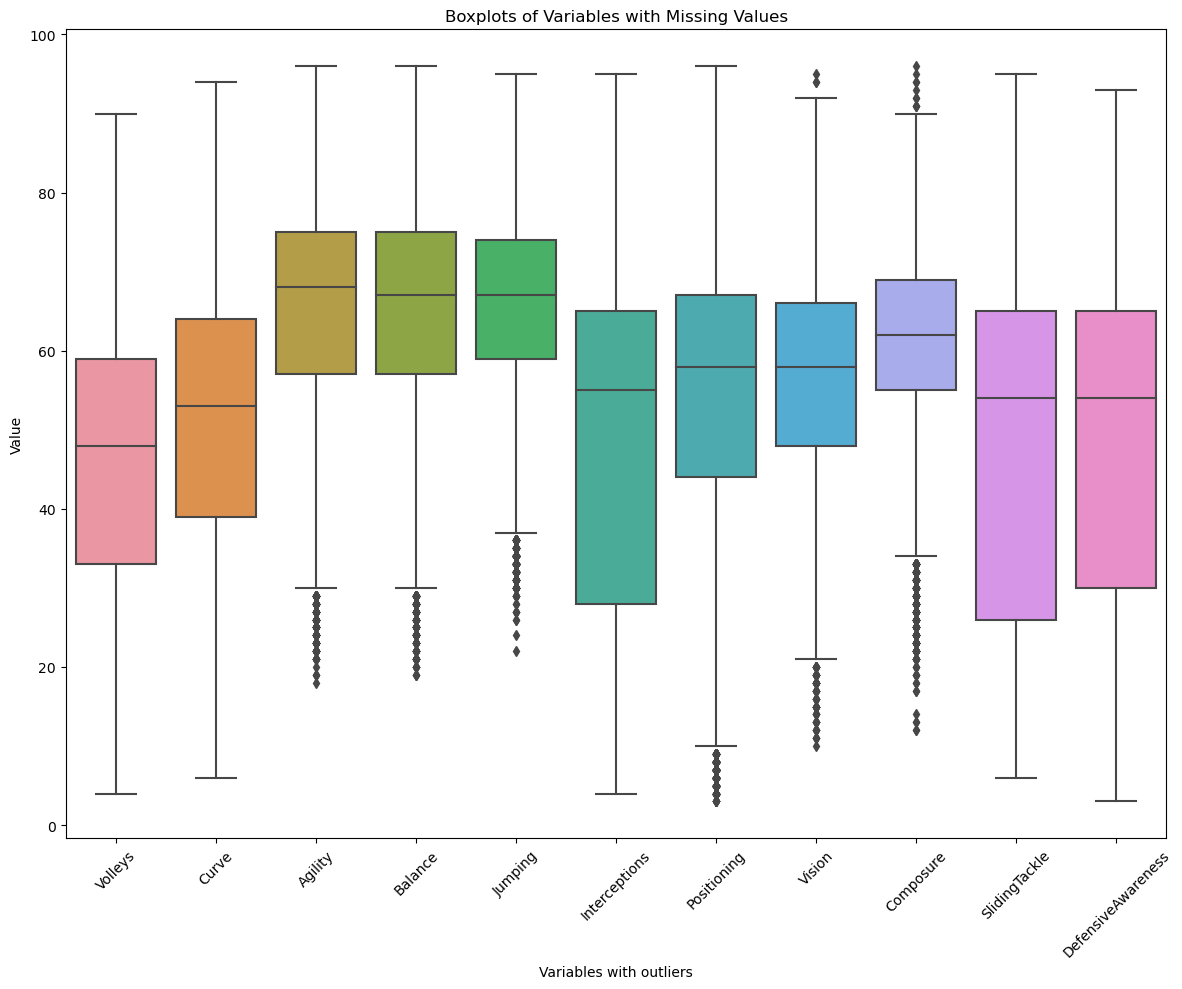

In [14]:
# Step 5: Visualize all boxplots together in one chart
plt.figure(figsize=(12, 10))
sns.boxplot(x='Variables with outliers', y='Value', data=df_long)
plt.title('Boxplots of Variables with Missing Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [16]:
#Filling missing values with mean for variables with No outliers

df['Volleys'] = df['Volleys'].fillna(df.Volleys.mean())
df['Curve'] = df['Curve'].fillna(df.Curve.mean())
df['Interceptions'] = df['Interceptions'].fillna(df.Interceptions.mean())
df['SlidingTackle'] = df['SlidingTackle'].fillna(df.SlidingTackle.mean())
df['DefensiveAwareness'] = df['DefensiveAwareness'].fillna(df.DefensiveAwareness.mean())

In [15]:
#Filling missing values with median for variables with outliers

df['Agility'] = df['Agility'].fillna(df.Agility.median())
df['Balance'] = df['Balance'].fillna(df.Balance.median())
df['Jumping'] = df['Jumping'].fillna(df.Jumping.median())
df['Positioning'] = df['Positioning'].fillna(df.Jumping.median())
df['Vision'] = df['Vision'].fillna(df.Jumping.median())
df['Composure'] = df['Composure'].fillna(df.Jumping.median())

In [17]:
#checking again for null values and there are no null values
df.isnull().sum()

Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Position                    0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance                     0
ShotPower                   0
Jumping                     0
Stamina                     0
Strength                    0
LongShots                   0
Aggression

In [18]:
#checking for duplicates
print(df.duplicated().sum())

0


# CLEANING POSITIONS

There are few HTML code in the column 'position', removing those HTML code and storing only the position


In [19]:
#extracting only the positions from the HTML code
df['Position'] = df['Position'].str.split(">")
df['Position'] = df['Position'].apply(lambda x:x[1])

In [20]:
#after extraction of position from HTML code
df['Position'].head()

0    CAM
1    LDM
2     RS
3    RCM
4     LB
Name: Position, dtype: object

In [21]:
#Checking for the number of subsitutes and reserves
print(df[df['Position']=='SUB'].value_counts().sum())
print(df[df['Position']=='RES'].value_counts().sum())

7218
2705


In [22]:
# Replacing "SUB"(subsitutes) and "RES"(reserves) with the positions mentionioned in the column of Best position 
df['Position'] = np.where(df['Position'] == 'SUB', df['Best Position'], df['Best Position'])
df['Position'] = np.where(df['Position'] == 'RES', df['Best Position'], df['Best Position'])

In [23]:
df[['Overall','Best Overall Rating']].describe(include="all")

Overall  Best Overall Rating
count  16710.000000         16710.000000
mean      67.646320            68.565410
std        6.457695             6.256253
min       28.000000            36.000000
25%       63.000000            65.000000
50%       68.000000            68.000000
75%       72.000000            73.000000
max       93.000000            93.000000

In [24]:
df=df.drop(['Best Position','Best Overall Rating'], axis=1)

In [25]:
#Unique player positions in the dataset 
df['Position'].unique()

array(['CAM', 'CM', 'ST', 'LB', 'CDM', 'CB', 'RB', 'LM', 'RW', 'LW', 'CF',
       'LWB', 'RM', 'RWB', 'GK'], dtype=object)

In [26]:
#Replacing the position values which denote the same this although the 
#same player plays either in the left side or right.
df['Position']= df['Position'].str.replace('LCB', 'CB')
df['Position']= df['Position'].str.replace('RCB', 'CB')
df['Position']= df['Position'].str.replace('LCM', 'CM')
df['Position']= df['Position'].str.replace('RCM', 'CM')
df['Position']= df['Position'].str.replace('LAM', 'CAM')
df['Position']= df['Position'].str.replace('RAM', 'CAM')
df['Position']= df['Position'].str.replace('RDM', 'DM')
df['Position']= df['Position'].str.replace('LDM', 'DM')
df['Position']= df['Position'].str.replace('RM', 'RW')
df['Position']= df['Position'].str.replace('LM', 'LW')
df['Position']= df['Position'].str.replace('ST', 'CF')
df['Position']= df['Position'].str.replace('RS', 'CF')
df['Position']= df['Position'].str.replace('LS', 'CF')
df['Position']= df['Position'].str.replace('LF', 'CF')
df['Position']= df['Position'].str.replace('RF', 'CF')

In [27]:
df['Position'].value_counts()

Position
CB     3214
CF     2631
CAM    2203
RW     1648
GK     1546
CDM    1262
CM     1011
LW      927
RB      856
LB      813
RWB     310
LWB     289
Name: count, dtype: int64

<Axes: ylabel='Position'>

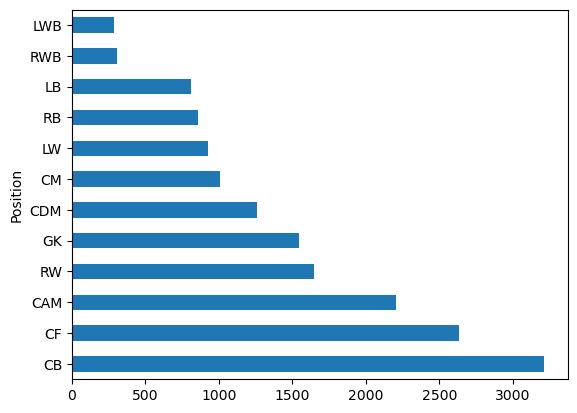

In [28]:
df['Position'].value_counts().plot(kind='barh')

In [29]:
eg=df

# CLEANING HEIGHT AND WEIGHT

Cleaning the 'Height' and 'Weight' column by removing the kg and cm units from the column

In [30]:
df['Weight']=df['Weight'].apply(lambda x : x[:-2])
df['Weight']=df['Weight'].astype('int64')

In [31]:
df['Weight'].head()

0    69
1    82
2    83
3    70
4    69
Name: Weight, dtype: int64

In [32]:
df['Height']=df['Height'].apply(lambda x : x[:-2])
df['Height']=df['Height'].astype('int64')

In [33]:
df['Height'].head()

0    179
1    189
2    182
3    181
4    172
Name: Height, dtype: int64

# VISUALIZATIONS

### UNIVARIATE

In [34]:
# Step 2: Calculate the count of players per club
players_per_club = df['Club'].value_counts().reset_index()

# Step 3: Rename the columns for better readability
players_per_club.columns = ['Club', 'Player Count']

# Step 4: Display the table
print(players_per_club)

                           Club  Player Count
0                      AC Milan           311
1                         Lazio            45
2                         Inter            42
3                     CÃ¡diz CF            42
4           FC Lokomotiv Moscow            42
..                          ...           ...
864              FC Barcelona B             1
865  Club AtlÃ©tico River Plate             1
866                   Najran SC             1
867                   GD Chaves             1
868                      Arezzo             1

[869 rows x 2 columns]


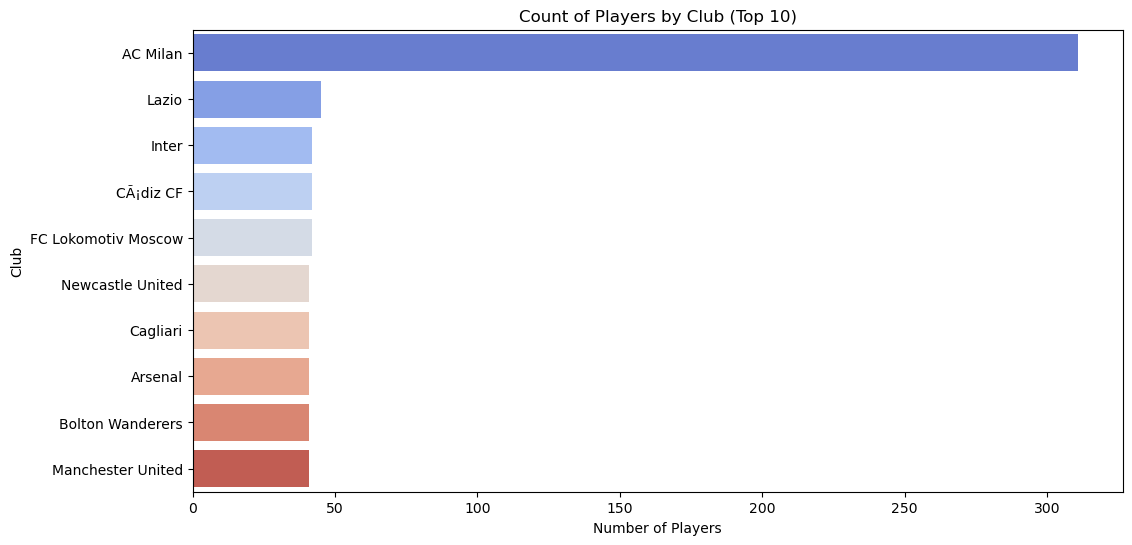

In [35]:
# Count plot of 'Clubs' (top 10 clubs by count)
plt.figure(figsize=(12, 6))
sns.countplot(y=df['Club'], order=df['Club'].value_counts().index[:10], palette='coolwarm')
plt.title('Count of Players by Club (Top 10)')
plt.xlabel('Number of Players')
plt.show()

In [36]:
# Players from Top 10 Nationalities
nationality_counts = df['Nationality'].value_counts()

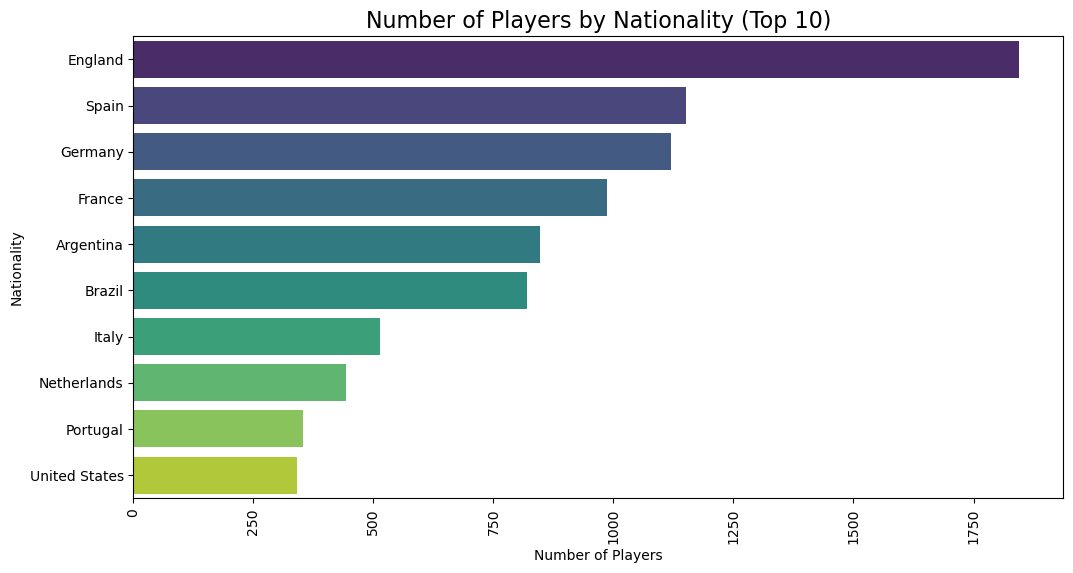

In [37]:
# Plotting the top 10 nationalities with the most players
plt.figure(figsize=(12, 6))
sns.barplot(x=nationality_counts.values[:10], y=nationality_counts.index[:10], palette='viridis')
plt.title('Number of Players by Nationality (Top 10)', fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('Number of Players')
plt.ylabel('Nationality')
plt.show()

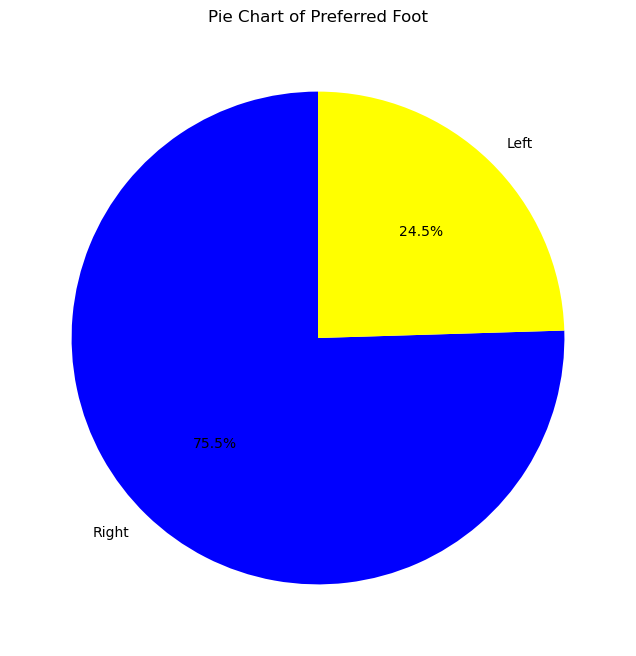

In [38]:
# Example: Pie chart of 'Preferred Foot'
preferred_foot_counts = df['Preferred Foot'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(preferred_foot_counts, labels=preferred_foot_counts.index, autopct='%1.1f%%', startangle=90, colors=['Blue', 'Yellow'])
plt.title('Pie Chart of Preferred Foot')
plt.show()

In [39]:
# Height Distribution of Players
height_dis = df["Height"].value_counts()
fig = px.bar(height_dis, title="Height Distribution of players")
fig.update_layout(
    xaxis_title = "Height",
    yaxis_title = "Frequency",
    title_x = 0.5, 
    showlegend = False
)
fig.show()

In [40]:
# weight Distribution of Players

weight_dis = df["Weight"].value_counts()
fig = px.bar(weight_dis, title="Weight Distribution of players")
fig.update_layout(
    xaxis_title = "Weight",
    yaxis_title = "Frequency",
    title_x = 0.5, 
    showlegend = False
)
fig.show()

In [41]:
# Age Distribution of Players
Age_dis = df["Age"].value_counts()
fig = px.bar(Age_dis, title="Age Distribution of players")
fig.update_layout(
    xaxis_title = "Age",
    yaxis_title = "Frequency",
    title_x = 0.5, 
    showlegend = False
)
fig.show()

The above plot show the age distribution of players. Most of the players are in the range of age 20-30 suggests that clubs prefer young players as they can be quick and have good skills whereas players more than 35are very less.

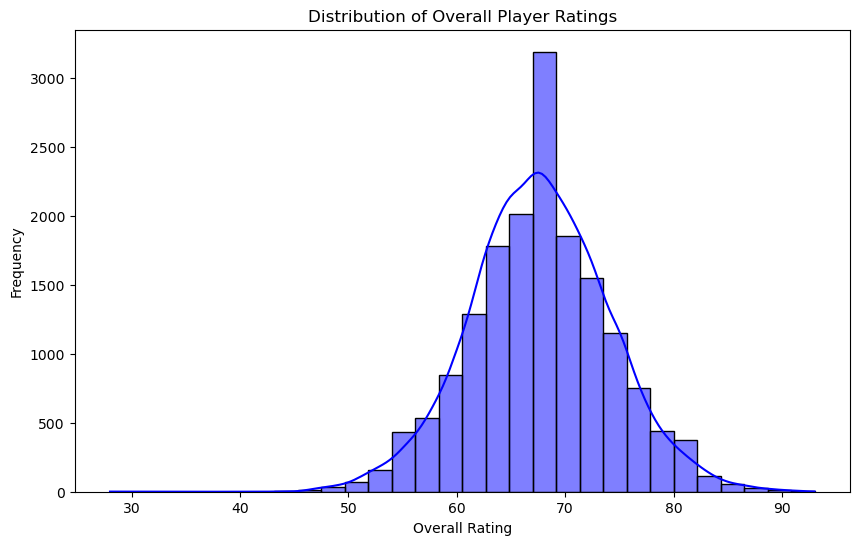

In [42]:
# Example: Visualize the distribution of the 'Overall' player rating
plt.figure(figsize=(10, 6))
sns.histplot(df['Overall'], bins=30, kde=True, color='blue')
plt.title('Distribution of Overall Player Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()

The above plot shows relation between number of player and overall of the players based on ages. The plot suggests that most of the players lie with in the overall range of 60-80. The above play shows a symmertrical distribution.

# TOP 10 PLAYERS

In [43]:
top_10_tall_player=df[['Name','Height','Position']].sort_values(['Height'],ascending=False)[:10]
top_10_tall_player

Name  Height Position
16176           T. HolÃ½     206       GK
15358       20Â M. Casey     203       CB
12448     20Â L. TraorÃ©     203       CF
14577          P. Ndiaye     203       CB
13126          F. MuliÄ     203       CF
15678         A. Noppert     203       GK
15751  21Â C. Pantilimon     203       GK
16591          S. Brolin     202       GK
15204         C. Ezekwem     202       CB
16197        K. Scherpen     202       GK

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning:

Glyph 135 (\x87) missing from current font.

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 135 (\x87) missing from current font.



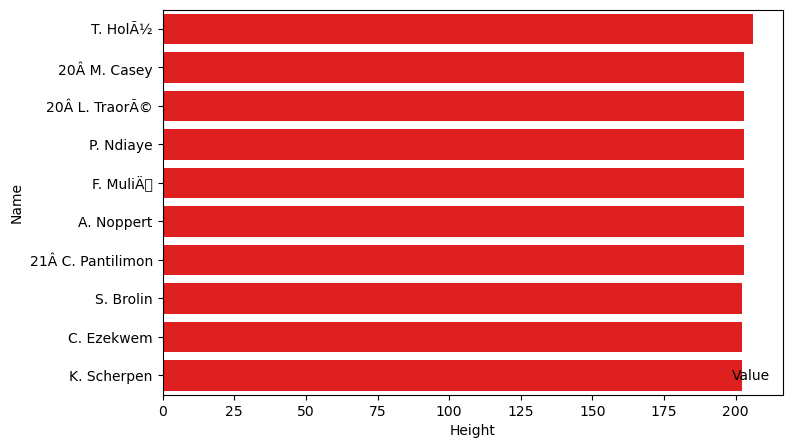

In [44]:
custom_dimension = (8, 5)
fig , ax = pyplot.subplots(figsize = custom_dimension)
sns.barplot(data = top_10_tall_player , x = "Height", y = "Name" , label = "Value" , color = "Red" , ax = ax)

ax.legend(ncol = 2, loc = "lower right", frameon = False)

In [45]:
top_10_fastest_players=df[['Name','SprintSpeed','Position']].sort_values(['SprintSpeed'],ascending=False)[:10]
top_10_fastest_players

Name  SprintSpeed Position
82         K. MbappÃ©         97.0       CF
2202    Adama TraorÃ©         96.0       RW
210         A. Davies         96.0       LB
4852      G. Holtmann         95.0       LW
58          A. Hakimi         95.0       RB
1967         D. James         95.0       RW
2101    VinÃ­cius Jr.         95.0       RW
587   IÃ±aki Williams         94.0       CF
7958     Igor Madinha         94.0       RW
511     F. Acheampong         94.0       LW

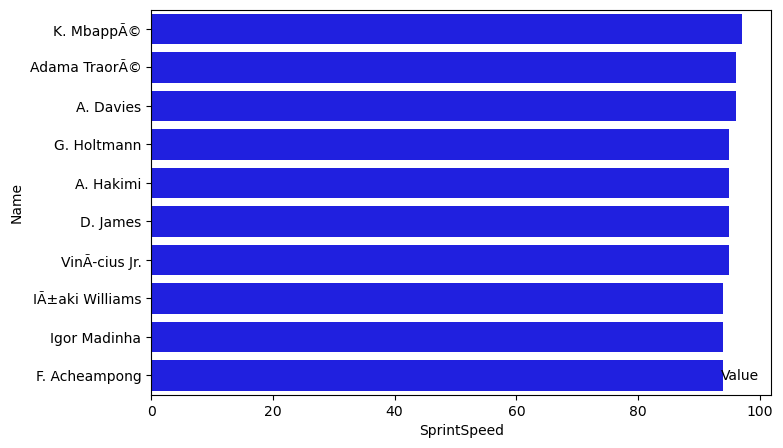

In [46]:
custom_dimension = (8, 5)
fig , ax = pyplot.subplots(figsize = custom_dimension)
sns.barplot(data = top_10_fastest_players , x = "SprintSpeed", y = "Name" , label = "Value" , color = "blue" , ax = ax)

ax.legend(ncol = 2, loc = "lower right", frameon = False)

In [47]:
top_10_heaviest_players=df[['Name','Weight','Position']].sort_values(['Weight'],ascending=False)[:10]
top_10_heaviest_players

Name  Weight Position
11849      A. Akinfenwa     110       CF
16034          C. Seitz     107       GK
16592      L. Watkowiak     105       GK
11502        O. OularÃ©     104       CF
15981     L. Unnerstall     103       GK
16128       E. Johansen     102       GK
15529          B. Hamid     102       GK
16176          T. HolÃ½     102       GK
16123  21Â R. Gilmartin     101       GK
14755     21Â W. Morgan     101       CB

The above stats suggests that most of the heavy players are goalkeepers

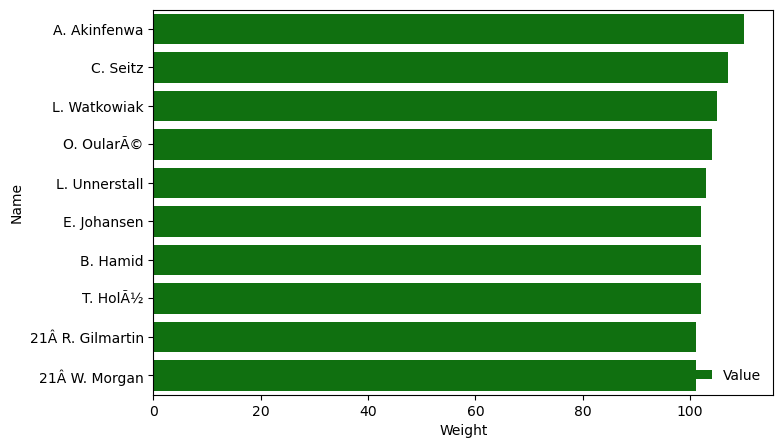

In [48]:
custom_dimension = (8, 5)
fig , ax = pyplot.subplots(figsize = custom_dimension)
sns.barplot(data = top_10_heaviest_players , x = "Weight", y = "Name" , label = "Value" , color = "Green" , ax = ax)

ax.legend(ncol = 2, loc = "lower right", frameon = False)

In [49]:
df_overall = df.sort_values(['Overall'],ascending=False)[:10]
df_overall[['Name','Overall','Potential','Club','Nationality','Position']].style.background_gradient(cmap='Blues')

the top ten players based on their overall rating. 2 players are goal keepers.

In [50]:
df_potentail = df.sort_values(['Potential'],ascending=False)[:10]
df_potentail[['Name','Potential','Overall','Club','Nationality','Position']].style.background_gradient(cmap='Greens')

The above is stats shows the top ten player with highest potentails. Most of the players are center forward that have highest potential.

### BIVARIATE

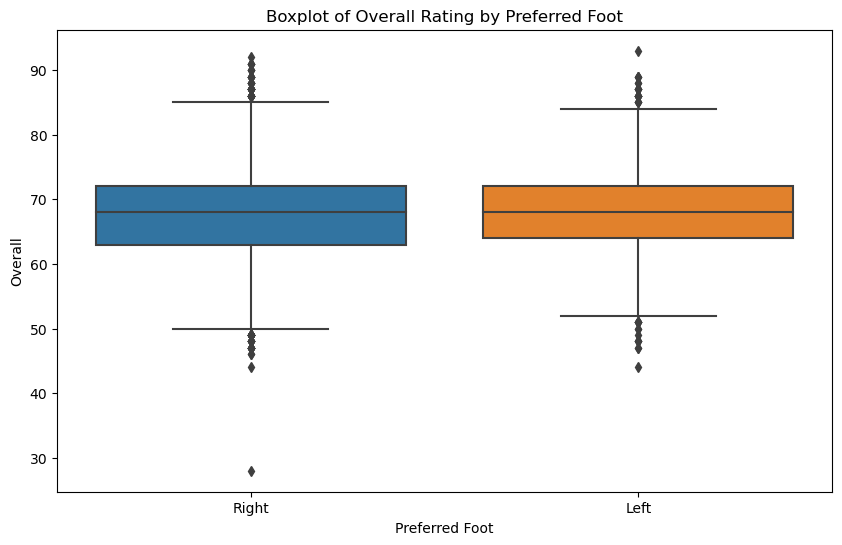

In [51]:
#Boxplot of Overall vs preferred foot

plt.figure(figsize=(10, 6))
sns.boxplot(x='Preferred Foot', y='Overall', data=df,)
plt.title('Boxplot of Overall Rating by Preferred Foot')
plt.xlabel('Preferred Foot')
plt.ylabel('Overall')
plt.show()

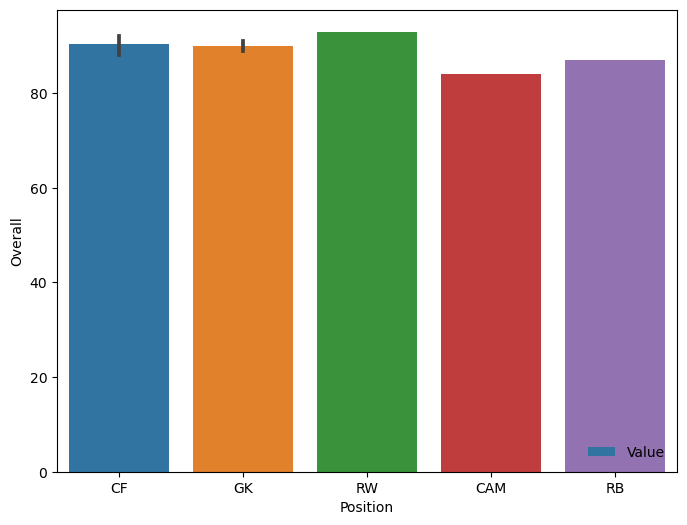

In [52]:
#Barplot of Overall vs position
custom_dimension = (8 , 6)
fig , ax = pyplot.subplots(figsize = custom_dimension)
sns.barplot(data = df_potentail , x = "Position", y = "Overall" , label = "Value", ax = ax)

ax.legend(ncol = 2, loc = "lower right", frameon = False)

The players with highest Overall rating play at the position of center forward.

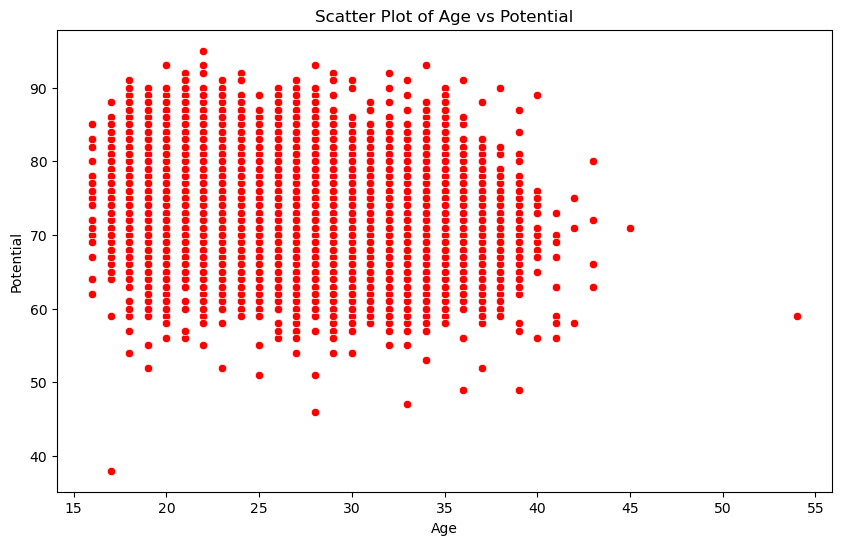

In [53]:
# Scatter plot of 'Age' vs. 'Potential'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Potential', data=df, color='Red')
plt.title('Scatter Plot of Age vs Potential')
plt.xlabel('Age')
plt.ylabel('Potential')
plt.show()

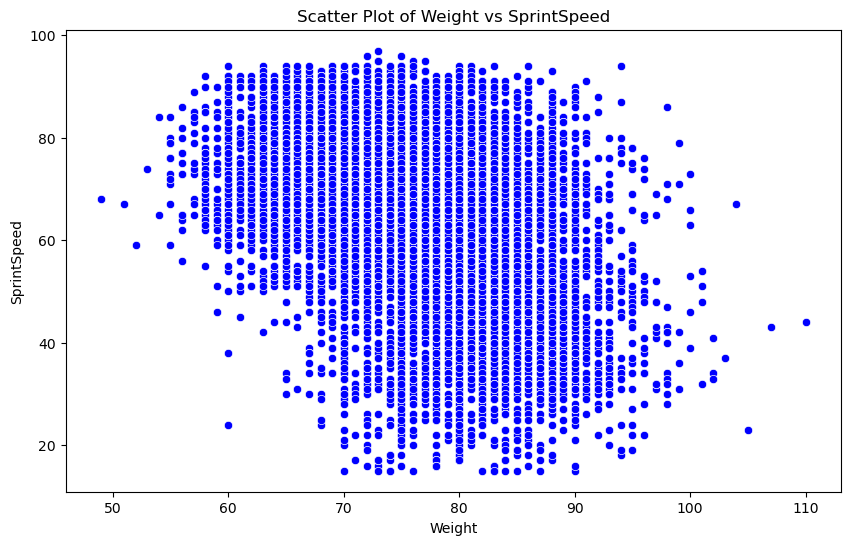

In [54]:
#'Weight' vs 'SprintSpeed'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Weight', y='SprintSpeed', data=df, color='blue')
plt.title('Scatter Plot of Weight vs SprintSpeed')
plt.xlabel('Weight')
plt.ylabel('SprintSpeed')
plt.show()

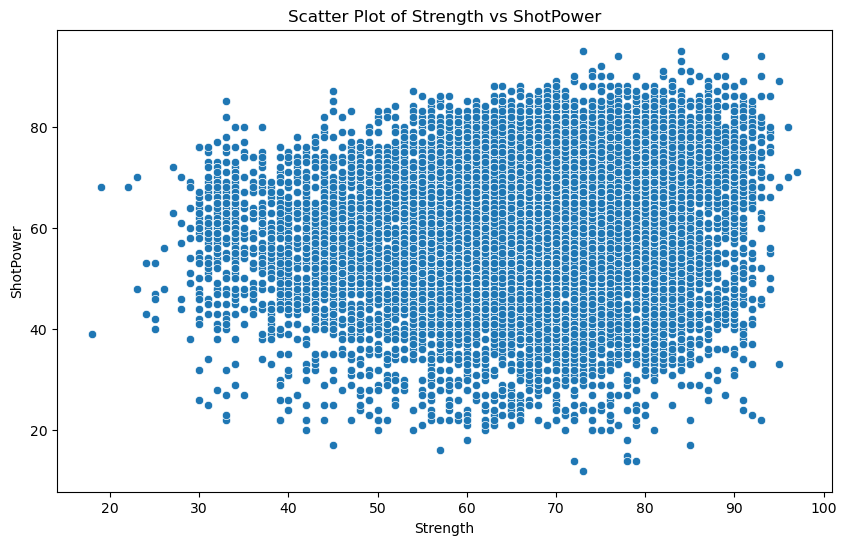

In [55]:
# Scatter plot of Strength vs ShotPower
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Strength', y='ShotPower', data=df,)
plt.title('Scatter Plot of Strength vs ShotPower')
plt.xlabel('Strength')
plt.ylabel('ShotPower')
plt.show()

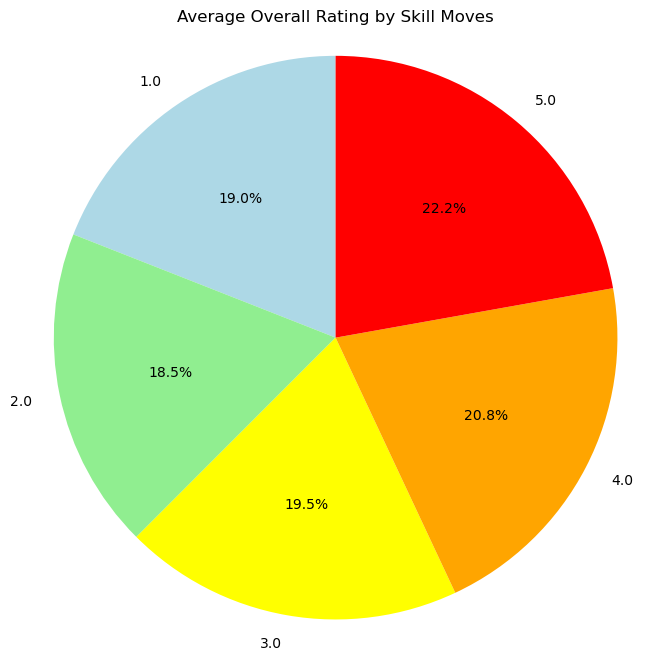

In [56]:
# Step 2: Group by 'Skill Moves' and calculate the average 'Overall'
skill_overall_avg = df.groupby('Skill Moves')['Overall'].mean()

# Step 3: Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(skill_overall_avg, labels=skill_overall_avg.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'yellow', 'orange', 'red'])
plt.title('Average Overall Rating by Skill Moves')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

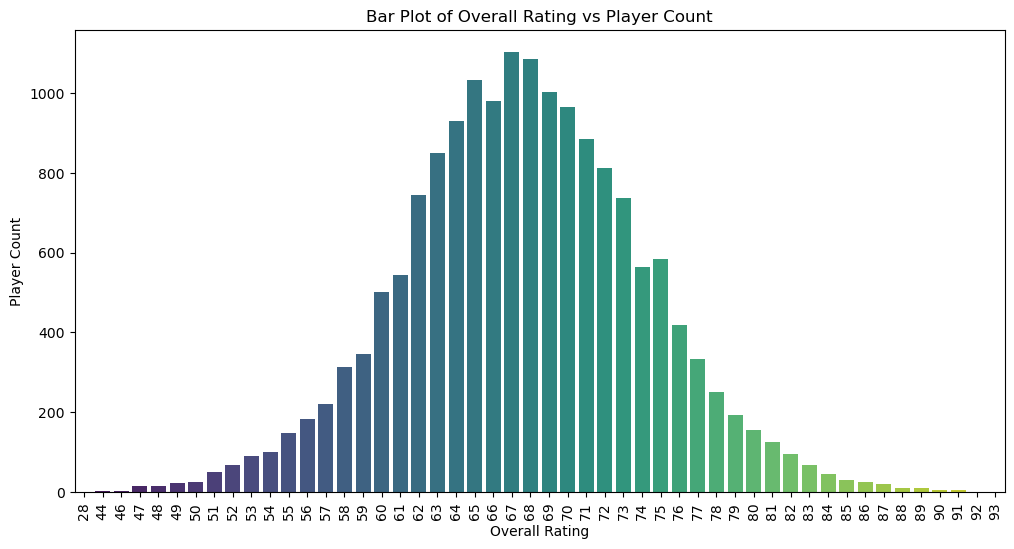

In [57]:
# Step 2: Bar plot for Overall vs Player Count
plt.figure(figsize=(12, 6))
sns.countplot(x='Overall', data=df, palette='viridis')
plt.title('Bar Plot of Overall Rating vs Player Count')
plt.xlabel('Overall Rating')
plt.ylabel('Player Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability if necessary
plt.show()

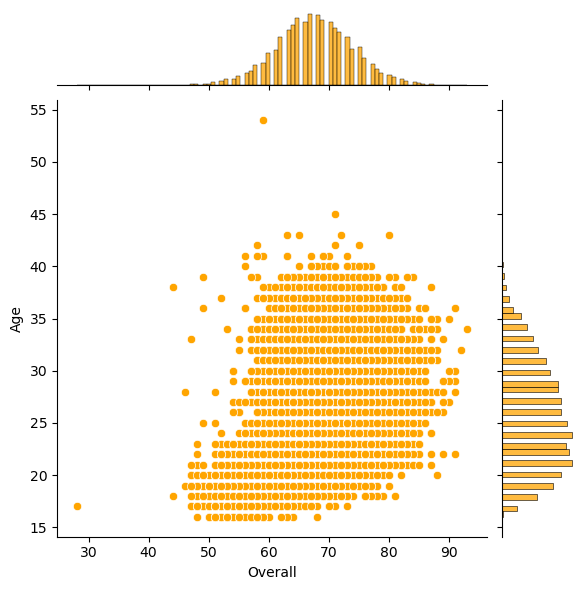

In [58]:
# Joint Plot of Overall vs Age
sns.jointplot(x='Overall', y='Age', data=df, color='orange')
plt.show()

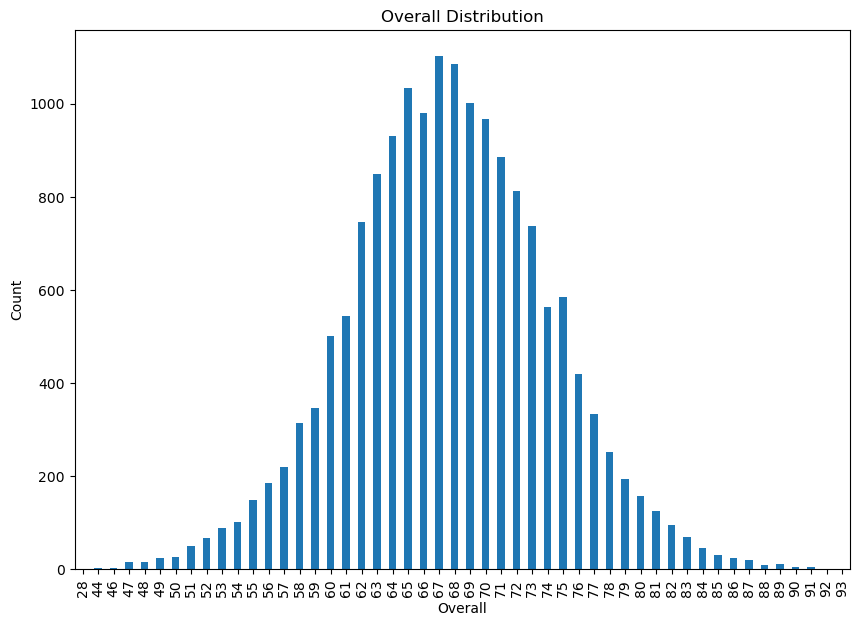

In [59]:
#Player Overall Distribution 
overall = df.groupby(df['Overall']).count().Age
overall.plot.bar(figsize=(10,7))
plt.ylabel('Count')
plt.title('Overall Distribution')
plt.rcParams["figure.figsize"] = (10,8)

plt.show()

The above plot shows relation between number of player and overall of the players based on ages. The plot suggests that most of the players lie with in the overall range of 60-80. The above play shows a symmertrical distribution

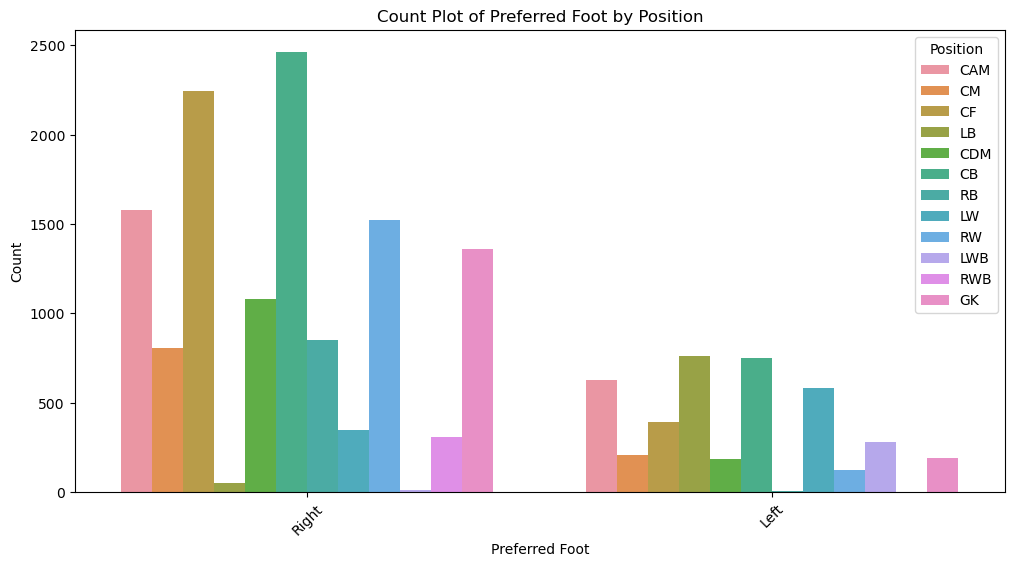

In [60]:
# Step 4: Bivariate Plot for Two Categorical Variables
# Example: Count plot of 'Preferred Foot' vs 'Best Position'
plt.figure(figsize=(12, 6))
sns.countplot(x='Preferred Foot', hue='Position', data=df)
plt.title('Count Plot of Preferred Foot by Position')
plt.xlabel('Preferred Foot')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Multivariate 

In [61]:
# List of variables to plot the distribution
variables = [
    'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 
    'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 
    'Reactions', 'Balance']

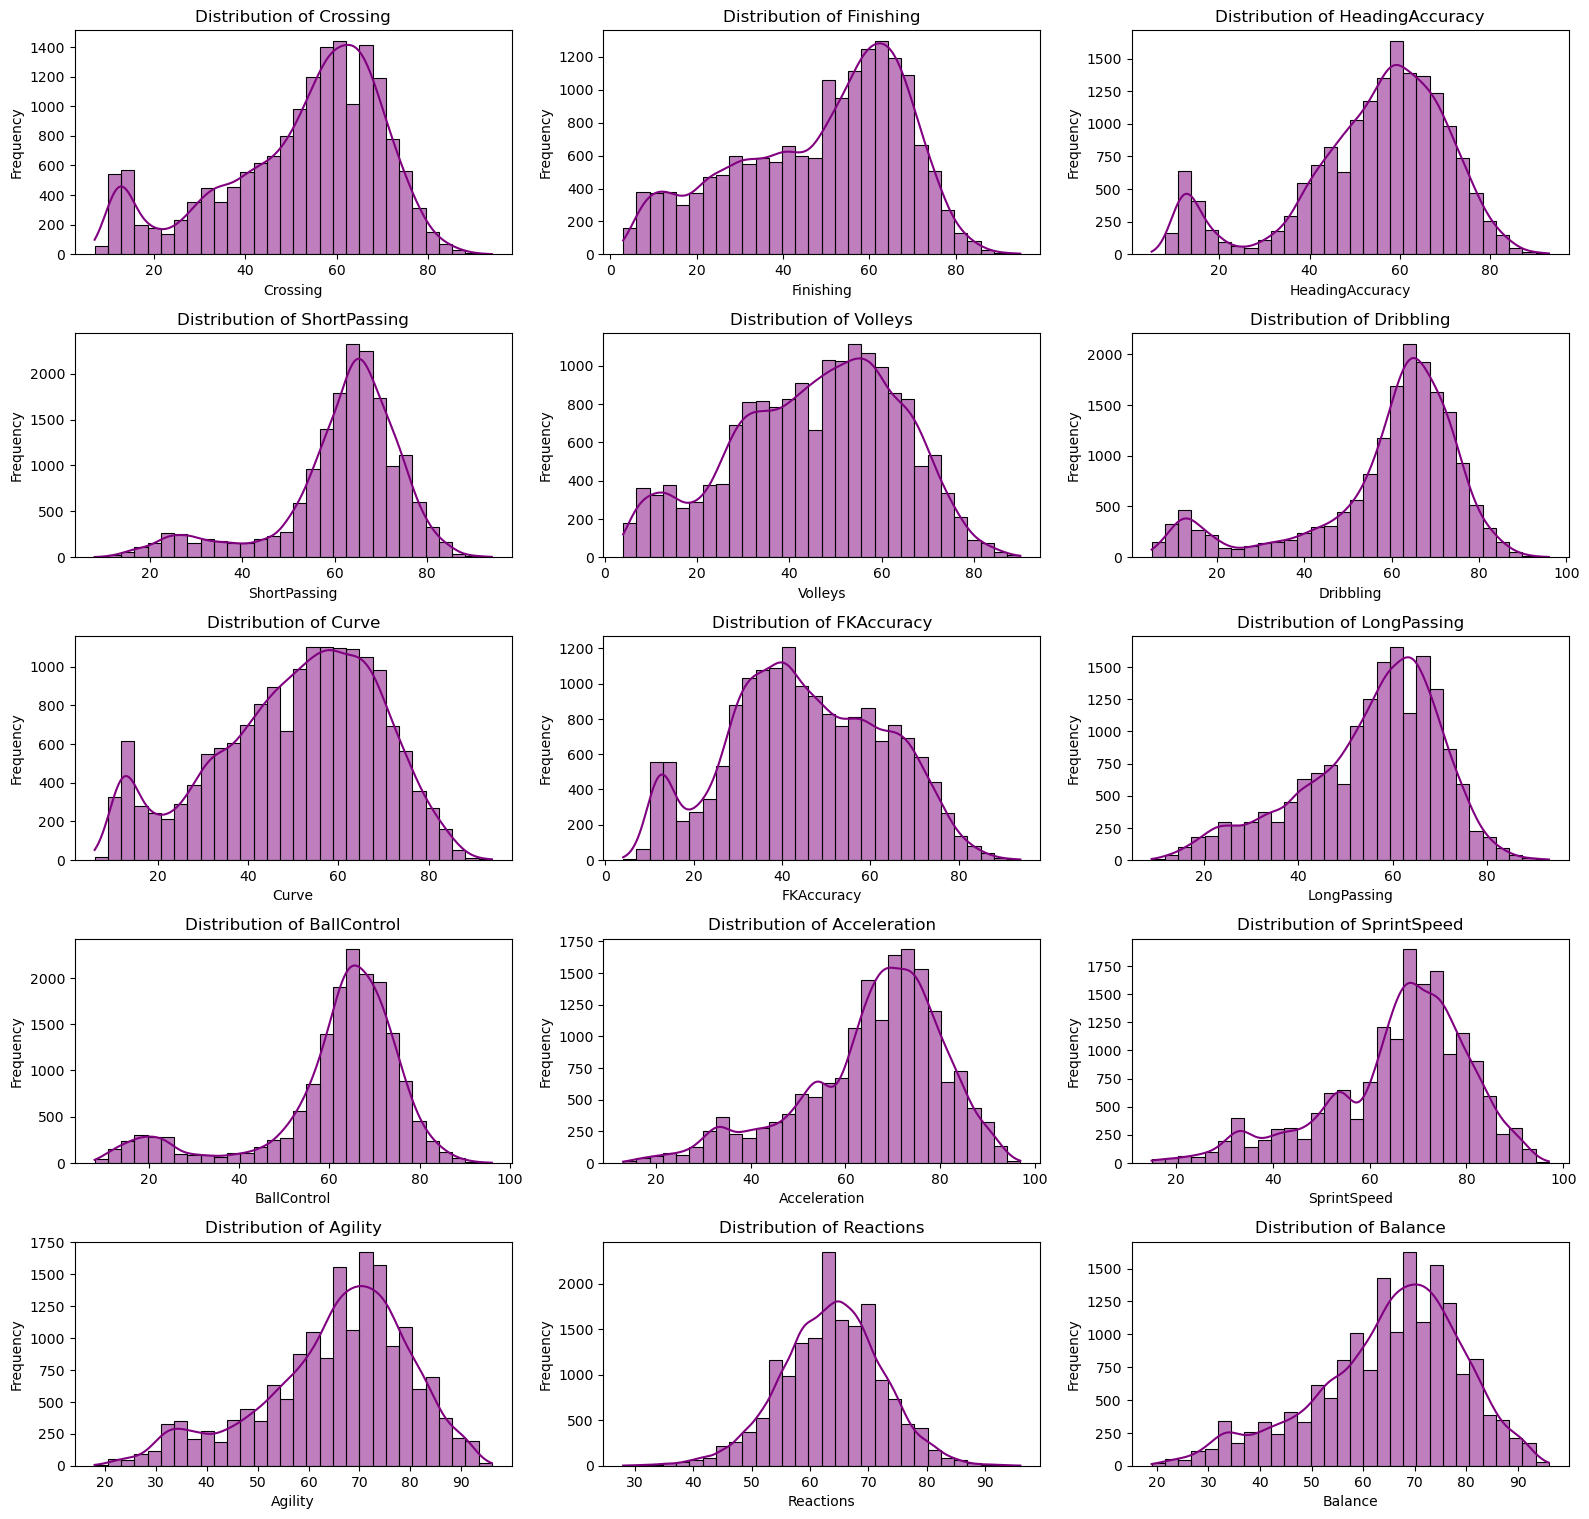

In [62]:
# Plot distributions using histograms for each variable
plt.figure(figsize=(16, 30))  # Set the figure size
for i, col in enumerate(variables, 1):
    plt.subplot(10, 3, i)  # Create a grid with 9 rows and 3 columns for subplots
    sns.histplot(df[col], bins=30, kde=True, color='Purple')  # KDE adds the smoothed distribution curve
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust the layout to prevent overlapping plots
plt.show()

In [63]:
# List of variables to plot the distribution
variables = [
    'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 
    'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 
    'StandingTackle', 'SlidingTackle', 'DefensiveAwareness'
]

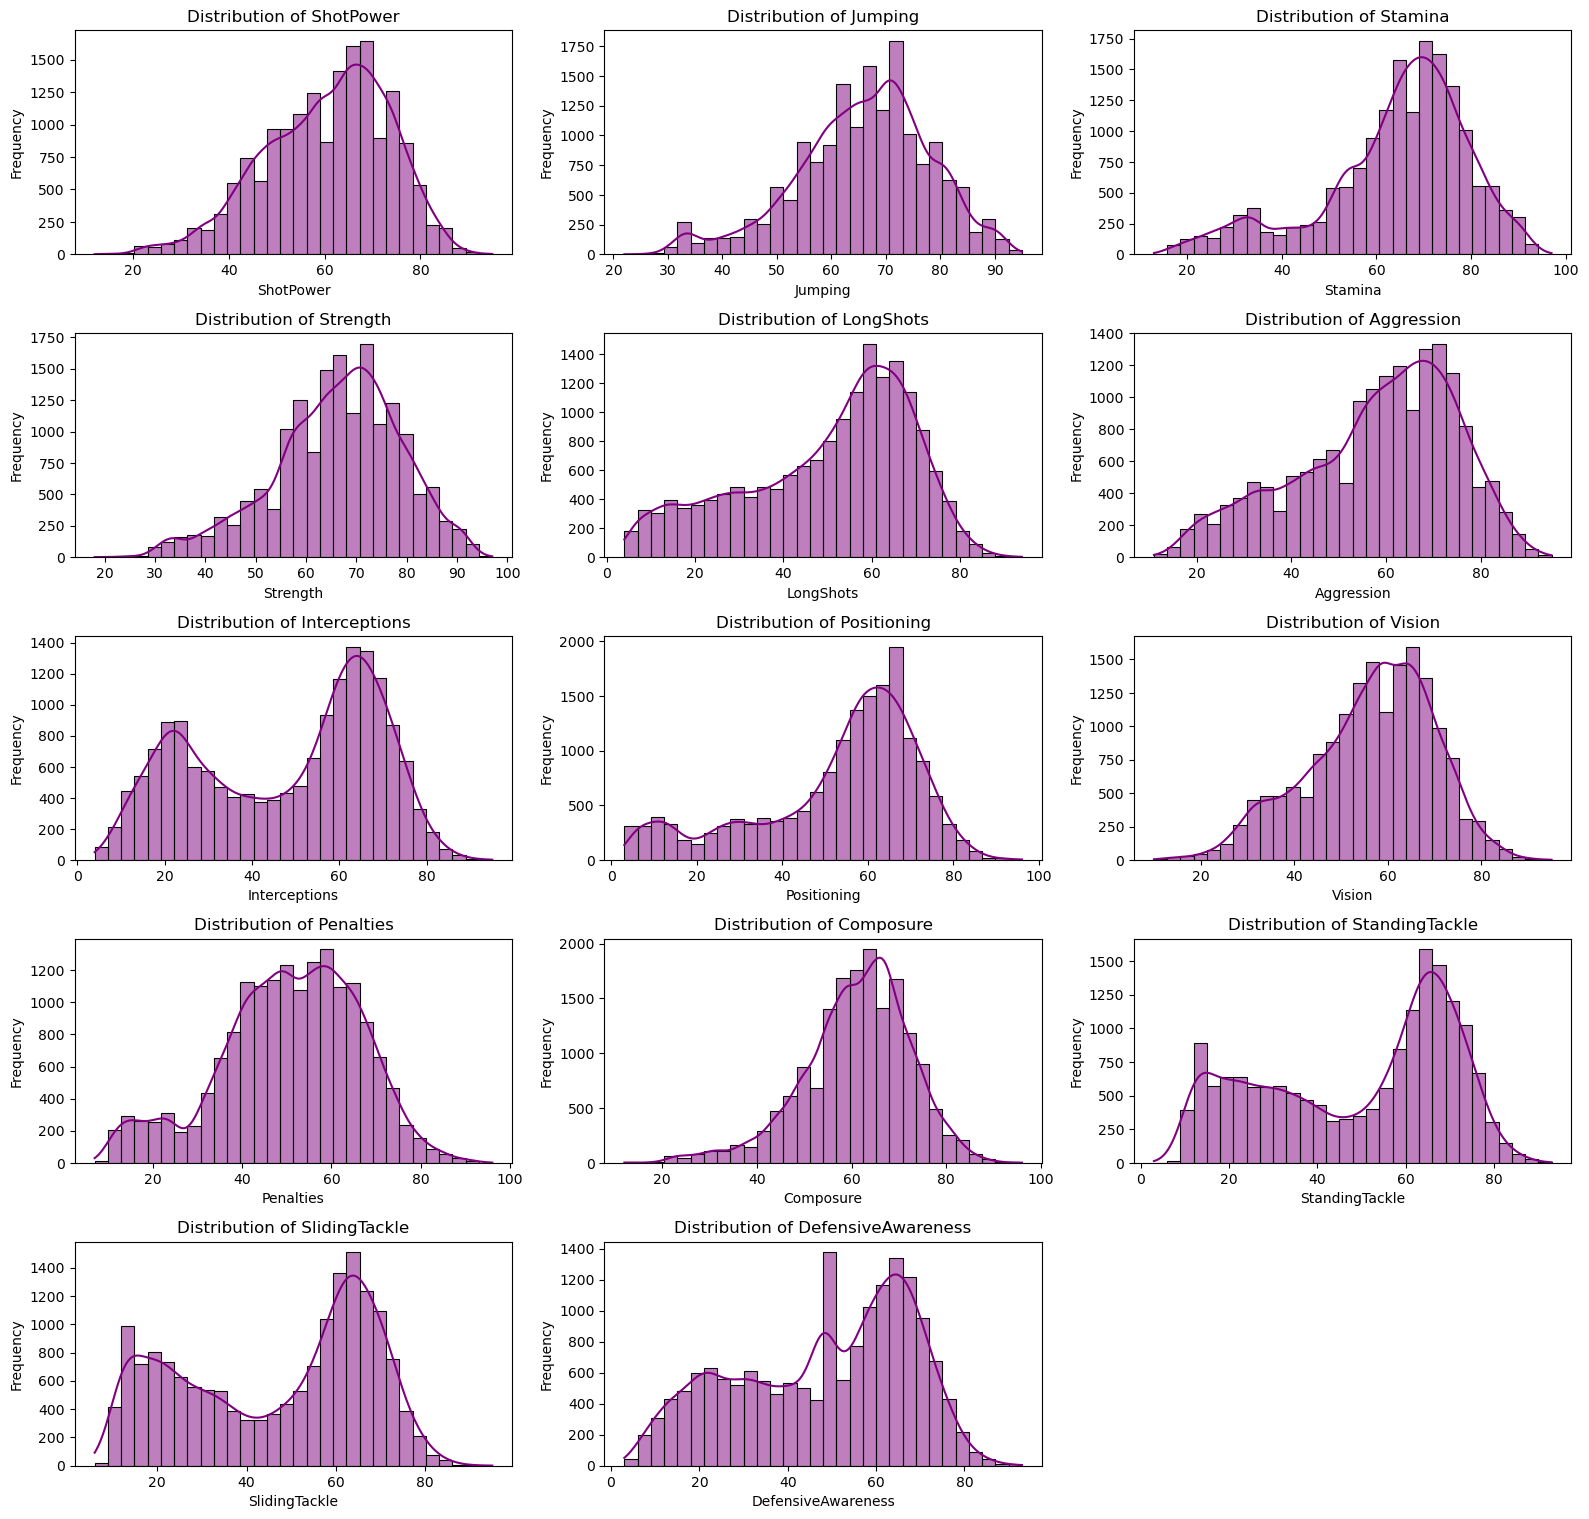

In [64]:
# Plot distributions using histograms for each variable
plt.figure(figsize=(16, 30))  # Set the figure size
for i, col in enumerate(variables, 1):
    plt.subplot(10, 3, i)  # Create a grid with 9 rows and 3 columns for subplots
    sns.histplot(df[col], bins=30, kde=True, color='Purple')  # KDE adds the smoothed distribution curve
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust the layout to prevent overlapping plots
plt.show()

# HEATMAP

In [65]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

In [66]:
# Calculate the correlation matrix for numerical columns
correlation_matrix = numeric_df.corr()

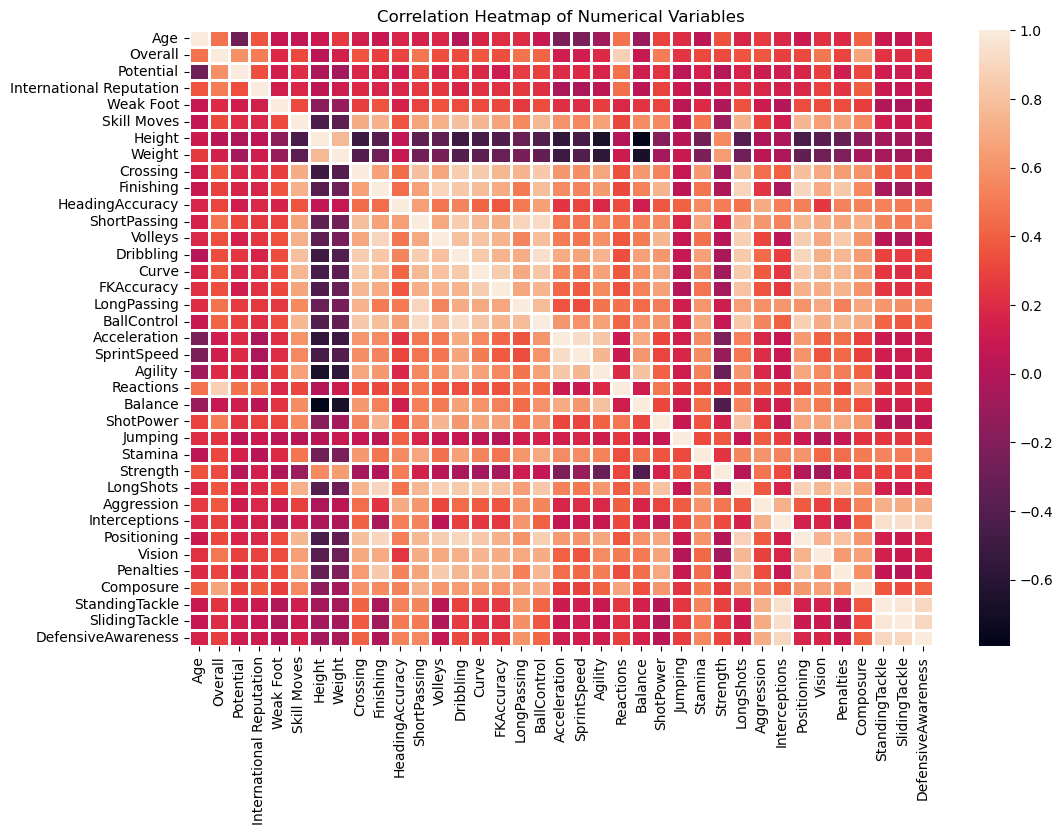

In [67]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, linewidths=2)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [68]:
high_corr_pairs = np.where(correlation_matrix > 0.93)
high_corr_pairs = [(correlation_matrix.index[x], correlation_matrix.columns[y]) for x, y in zip(*high_corr_pairs) if x != y and x < y]
high_corr_pairs

[('Dribbling', 'BallControl'),
 ('Interceptions', 'StandingTackle'),
 ('Interceptions', 'SlidingTackle'),
 ('StandingTackle', 'SlidingTackle')]

We see that there are 5 paris that are highly correlated i.e. correlation > 0.93. The two pairs here Interception & StandingTackle and Interception & SlidingTackle are highly correlated. As Interception is common in both we will keep interception and drop the other two variables(StandingTackle,SlidingTackle). if not dropped it can increase the complexity of algorithm, thus increasing the errors and decreasing efficiency.

In [69]:
df.drop(['SlidingTackle' , 'StandingTackle'] , axis = 1 , inplace = True)

In [70]:
df.Nationality.value_counts()

Nationality
England                   1845
Spain                     1151
Germany                   1120
France                     987
Argentina                  846
                          ... 
Belize                       1
SÃ£o TomÃ© e PrÃ­ncipe       1
Rwanda                       1
Tanzania                     1
Oman                         1
Name: count, Length: 168, dtype: int64

# Save the original indices of the dataset before the split

In [71]:
df['Original Index'] = df.index

In [72]:
# Saving The File
file_path = r'C:\Users\Yash\Desktop\Research Project\FIFA 22 FINAL FILE(Cleaned data with OG Index).csv'

# Save the DataFrame to a CSV file
df.to_csv(file_path, index=False)

print(f"File successfully saved at: {file_path}")

File successfully saved at: C:\Users\Yash\Desktop\Research Project\FIFA 22 FINAL FILE(Cleaned data with OG Index).csv


In [73]:
# dropping name,Nationality & club column
df=df.drop(['Name','Nationality','Club','Position'], axis=1)

Name : This is the player's name, thus it shouldn't mean anything.

Nationality : It shouldn't matter much where a player is from in terms of their position. Even if it does, as seen above, it contains 168 distinct values, and one-hot encoding them will increase the dimensionality of the train and test sets.

Club : In terms of their position, a player's club shouldn't really matter. Even if it does, as can be shown above, it contains 869 unique values, and one-hot encoding them will make the train and test sets more dimensional.Thus, increasing the complexity.

Position: We dropped Position as it was a categorical variable and had unique values which was leading to complexity in Model prediction.

# TRAIN TEST SPLIT

In [74]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=7)
print(f"{train_set.shape[0]} train and {test_set.shape[0]} test instances")

13368 train and 3342 test instances


# ONE HOT ENCODING

In [75]:
from sklearn.preprocessing import OneHotEncoder


def get_dummies(trainset, testset, old_col_name):
    """Given a trainset, a testset, and the name of a column holding a 
    categorical variable, fit an encoder on the trainset, and use the 
    encoder to add dummy columns into the trainset and testset
    """
    
    one_hot_encoder = OneHotEncoder(drop="first", sparse_output=False)
    
    # the input to the encoder must be a 2-d numpy array,
    # so we take the column, extract their values and reshape the array to be 2-d
    cat_vals = trainset[old_col_name].values.reshape(-1,1)

    # fit an encoder and transform the **trainset**
    
    # the output is a new numpy array
    transformed = one_hot_encoder.fit_transform(cat_vals)
    
    # in the list of new columns, convert numpy array to a list and
    # drop the first column, because we requested "drop='first'"
    new_col_names = one_hot_encoder.categories_[0].tolist()[1:]
    
    for i, new_col_name in enumerate(new_col_names):
        
        # put the transformed data as columns in the trainset dataframe
        trainset[new_col_name] = transformed[:,i]
    
    # transform the **testset** using the fitted encoder
    
    cat_vals = testset[old_col_name].values.reshape(-1,1)
    transformed = one_hot_encoder.transform(cat_vals)

    for i, new_col_name in enumerate(new_col_names):
        
        # put the transformed data as columns in the testset dataframe
        testset[new_col_name] = transformed[:,i]
    
    return trainset, testset


for col_name in ["Preferred Foot"]:
    trainset, testset = get_dummies(train_set, test_set, col_name)

# check if the dummies are produced correctly in the trainset
trainset.head()

Age  Overall  Potential Preferred Foot  International Reputation  \
7655    25       77         81          Right                       1.0   
4565    31       76         76          Right                       1.0   
722     29       73         73           Left                       1.0   
5904    29       67         67          Right                       1.0   
11894   28       63         65          Right                       1.0   

       Weak Foot  Skill Moves  Height  Weight  Crossing  ...  LongShots  \
7655         3.0          2.0     189      75      52.0  ...       27.0   
4565         3.0          3.0     180      80      45.0  ...       66.0   
722          2.0          3.0     171      69      80.0  ...       74.0   
5904         3.0          2.0     178      72      62.0  ...       67.0   
11894        4.0          2.0     185      70      47.0  ...       33.0   

       Aggression  Interceptions  Positioning  Vision  Penalties  Composure  \
7655         75.0           80.0         40.0    57.0       38.0       72.0   
4565         56.0           44.0         84.0    71.0       73.0       81.0   
722          79.0           71.0         63.0    77.0       67.0       69.0   
5904         62.0           54.0         67.0    71.0       65.0       62.0   
11894        61.0           61.0         40.0    49.0       32.0       67.0   

       DefensiveAwareness  Original Index  Right  
7655                 78.0            7655    1.0  
4565                 30.0            4565    1.0  
722                  68.0             722    0.0  
5904                 44.0            5904    1.0  
11894                62.0           11894    1.0  

[5 rows x 38 columns]

In [76]:
# check if the dummies are produced correctly in the testset
testset.head()

Age  Overall  Potential Preferred Foot  International Reputation  \
609     30       76         76          Right                       1.0   
10057   21       63         75          Right                       1.0   
7098    21       70         70          Right                       1.0   
16375   24       65         69          Right                       1.0   
14372   17       52         75          Right                       1.0   

       Weak Foot  Skill Moves  Height  Weight  Crossing  ...  LongShots  \
609          5.0          3.0     175      75      78.0  ...       53.0   
10057        3.0          3.0     172      65      59.0  ...       61.0   
7098         3.0          2.0     179      73      66.0  ...       61.0   
16375        3.0          1.0     189      76      12.0  ...        5.0   
14372        3.0          3.0     168      63      44.0  ...       44.0   

       Aggression  Interceptions  Positioning  Vision  Penalties  Composure  \
609          90.0           73.0         71.0    70.0       51.0       72.0   
10057        54.0           29.0         60.0    60.0       51.0       64.0   
7098         56.0           22.0         57.0    69.0       49.0       65.0   
16375        28.0            8.0          8.0    50.0       13.0       34.0   
14372        32.0           31.0         43.0    47.0       43.0       56.0   

       DefensiveAwareness  Original Index  Right  
609                  75.0             609    1.0  
10057                39.0           10057    1.0  
7098                 37.0            7098    1.0  
16375                14.0           16375    1.0  
14372                22.0           14372    1.0  

[5 rows x 38 columns]

In [77]:
#dropping the originial coulumns as they have been encoded
testset=testset.drop(['Preferred Foot'], axis=1)
trainset=trainset.drop(['Preferred Foot'], axis=1)

In [78]:
trainset.columns

Index(['Age', 'Overall', 'Potential', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'DefensiveAwareness', 'Original Index', 'Right'],
      dtype='object')

# FEATURE SCALING

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# removing target variable before scaling
trainset_target = trainset["Overall"].values
trainset_predictors = trainset.drop("Overall", axis=1)

# putting back the numpy array, returned from fit_transform into dataframe
scaled_vals = scaler.fit_transform(trainset_predictors)
trainset = pd.DataFrame(scaled_vals, columns=trainset_predictors.columns)

# joining the non-scale target back
trainset['Overall'] = trainset_target

# inspect the data
trainset.head()

Age  Potential  International Reputation  Weak Foot  Skill Moves  \
0 -0.146491   1.477862                 -0.350466  -0.011938    -0.603331   
1  1.041673   0.600774                 -0.350466  -0.011938     0.658059   
2  0.645618   0.074521                 -0.350466  -1.476057     0.658059   
3  0.645618  -0.977984                 -0.350466  -0.011938    -0.603331   
4  0.447591  -1.328820                 -0.350466   1.452181    -0.603331   

     Height    Weight  Crossing  Finishing  HeadingAccuracy  ...  Aggression  \
0  1.103713 -0.040907 -0.011703  -0.964856         1.050888  ...    1.012004   
1 -0.207313  0.660362 -0.405499   1.657417         0.521131  ...   -0.113902   
2 -1.518339 -0.882431  1.563478  -0.707770         1.109750  ...    1.249036   
3 -0.498652 -0.461669  0.550862   0.423407        -1.009277  ...    0.241647   
4  0.521035 -0.742177 -0.292986  -0.347850         0.403407  ...    0.182389   

   Interceptions  Positioning    Vision  Penalties  Composure  \
0       1.529920    -0.684681  0.044838  -0.802933   0.956604   
1      -0.195318     1.603211  1.085461   1.418137   1.748773   
2       1.098610     0.511263  1.531441   1.037382   0.692548   
3       0.283914     0.719253  1.085461   0.910464   0.076417   
4       0.619377    -0.684681 -0.549803  -1.183688   0.516511   

   DefensiveAwareness  Original Index     Right  Overall  
0            1.525652       -0.144941  0.570901       77  
1           -0.915231       -0.784405  0.570901       76  
2            1.017135       -1.579699 -1.751619       73  
3           -0.203307       -0.507304  0.570901       67  
4            0.712025        0.732304  0.570901       63  

[5 rows x 37 columns]

In [80]:
# removing target variable before scaling
trainset_target = testset["Overall"].values
trainset_predictors = testset.drop("Overall", axis=1)

# putting back the numpy array, returned from fit_transform into dataframe
scaled_vals = scaler.transform(trainset_predictors)
testset = pd.DataFrame(scaled_vals, columns=trainset_predictors.columns)

# joining the non-scale target back
testset['Overall'] = trainset_target

# inspect the data
testset.head()

Age  Potential  International Reputation  Weak Foot  Skill Moves  \
0  0.843645   0.600774                 -0.350466   2.916299     0.658059   
1 -0.938600   0.425356                 -0.350466  -0.011938     0.658059   
2 -0.938600  -0.451732                 -0.350466  -0.011938    -0.603331   
3 -0.344518  -0.627149                 -0.350466  -0.011938    -1.864721   
4 -1.730709   0.425356                 -0.350466  -0.011938     0.658059   

     Height    Weight  Crossing  Finishing  HeadingAccuracy  ...  Aggression  \
0 -0.935661 -0.040907  1.450965   0.474824         0.756578  ...    1.900876   
1 -1.372670 -1.443446  0.382092   0.423407        -0.773830  ...   -0.232418   
2 -0.352983 -0.321415  0.775887   0.783326        -1.068139  ...   -0.113902   
3  1.103713  0.099347 -2.261963  -2.044615        -2.363100  ...   -1.773131   
4 -1.955348 -1.723954 -0.461755  -0.347850        -1.362449  ...   -1.536098   

   Interceptions  Positioning    Vision  Penalties  Composure  \
0       1.194457     0.927243  1.011130   0.022036   0.956604   
1      -0.914167     0.355270  0.267829   0.022036   0.252455   
2      -1.249630     0.199277  0.936800  -0.104882   0.340473   
3      -1.920556    -2.348603 -0.475473  -2.389412  -2.388107   
4      -0.818321    -0.528688 -0.698463  -0.485637  -0.451695   

   DefensiveAwareness  Original Index     Right  Overall  
0            1.373097       -1.603084  0.570901       76  
1           -0.457565        0.352143  0.570901       63  
2           -0.559269       -0.260210  0.570901       70  
3           -1.728859        1.659629  0.570901       65  
4           -1.322045        1.245116  0.570901       52  

[5 rows x 37 columns]

In [81]:
# dropping target variable and keeping others
X_train = trainset.drop("Overall", axis=1)
y_train = trainset["Overall"].copy()

In [82]:
# dropping the target variable from test set and only keeping the predictors
#copying the  target variable in another variable
X_test = testset.drop("Overall", axis=1)
y_test = testset["Overall"].copy()

In [83]:
# counts for Overall
y_train.value_counts()

Overall
67    896
68    846
65    814
69    811
66    765
70    754
64    752
71    701
63    694
72    640
62    601
73    564
75    479
74    448
61    446
60    400
76    342
59    287
77    273
58    255
78    201
57    175
79    158
56    146
80    131
55    118
81    106
54     87
82     79
53     66
83     56
52     52
51     41
84     37
85     26
49     20
50     18
86     18
87     16
48     14
89     10
47      8
91      5
88      4
90      3
44      2
92      1
93      1
46      1
Name: count, dtype: int64

In [84]:
trainset.shape[0]

13368

<Axes: xlabel='Overall'>

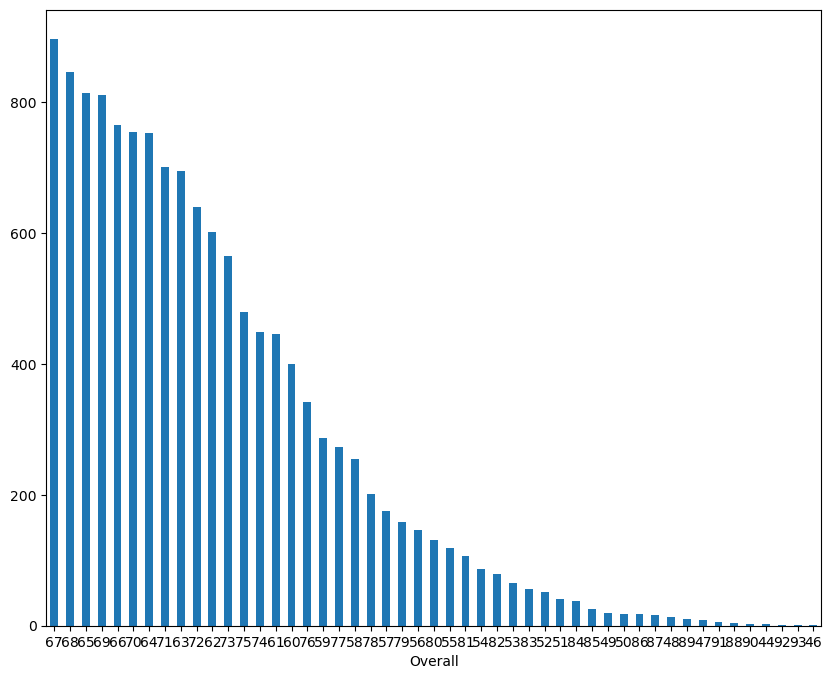

In [85]:
#visualising Overall
y_train.value_counts().plot(kind="bar", rot=0)

# BASELINE MODEL (Linear Regression)

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time
import math

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Measure the time taken for training
start = time.time()
lr_model.fit(X_train, y_train)  # Fit the model with training data
end = time.time() - start
print(f"Took {end} seconds to train Linear Regression model")

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Make predictions on the training set
y_train_pred_lr = lr_model.predict(X_train)

# Calculate RMSE for the training set
train_mse_lr = mean_squared_error(y_train, y_train_pred_lr)
train_rmse_lr = math.sqrt(train_mse_lr)

# Calculate RMSE for the test set
test_mse_lr = mean_squared_error(y_test, y_pred_lr)
test_rmse_lr = math.sqrt(test_mse_lr)

# Calculate evaluation metrics for the test set
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = math.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Print the results
print("Linear Regression Model Evaluation:")
print(f"Training RMSE: {train_rmse_lr}")
print(f"Test RMSE: {test_rmse_lr}")
print(f"RMSE Difference (Test - Train): {test_rmse_lr - train_rmse_lr}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr}")
print(f"R² Score: {r2_lr}")

Took 0.021081209182739258 seconds to train Linear Regression model
Linear Regression Model Evaluation:
Training RMSE: 1.9128881787384153
Test RMSE: 1.9223966033245667
RMSE Difference (Test - Train): 0.00950842458615142
Root Mean Squared Error (RMSE): 1.9223966033245667
R² Score: 0.9084315582022222


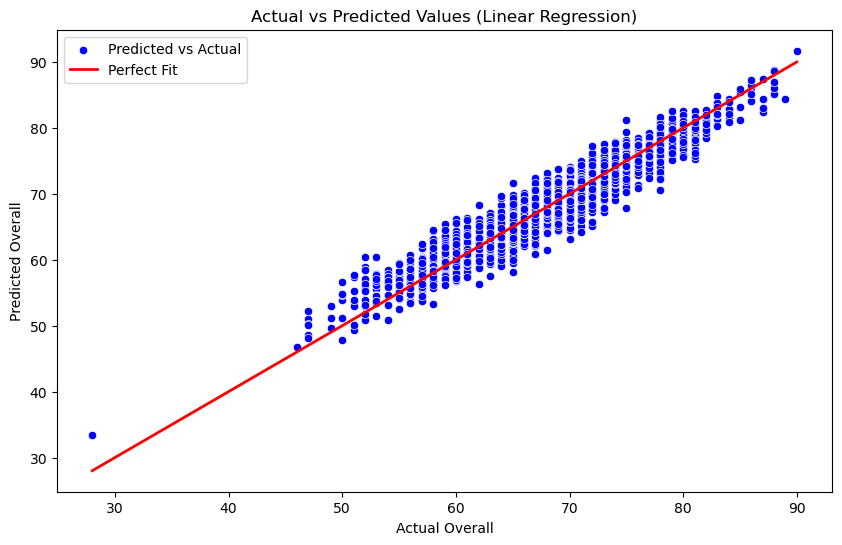

In [87]:
# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, color='blue', label='Predicted vs Actual')

# Plot a diagonal line representing perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Perfect Fit')

# Set labels and title
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.xlabel('Actual Overall')
plt.ylabel('Predicted Overall')
plt.legend()
plt.show()

# Random Forest

In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
import time
import math

# Custom scoring function for RMSE
def rmse_scorer(y_true, y_pred):
    return math.sqrt(mean_squared_error(y_true, y_pred))

# Create the RMSE scorer for GridSearchCV
scorer = make_scorer(rmse_scorer, greater_is_better=False)

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=7)

# Provide the values of the hyperparameters. There will be 3x3x3=36 combinations
param_grid = {
    'n_estimators': [10, 30, 50],
    'max_depth': [5, 10, 15],
    'min_samples_split': [10, 25, 30]
}

# 5-fold cross-validation has been used with RMSE scoring
rf_grid_search = GridSearchCV(rf, param_grid, cv=3,
                              scoring=scorer,  # Use custom RMSE scorer
                              return_train_score=True, verbose=2, n_jobs=-1) # Use all available CPU cores

start = time.time()
rf_grid_search.fit(X_train, y_train)  # Ensure X_train and y_train are defined
end = time.time() - start
print(f"Took {end} seconds")

# Print best parameters and best score (negative RMSE)
print("Best parameters found: ", rf_grid_search.best_params_)
print("Best score (negative RMSE): ", rf_grid_search.best_score_)

# Get the best estimator
best_rf = rf_grid_search.best_estimator_

# Predictions and evaluation on the test set
y_pred = best_rf.predict(X_test)

# Calculate the RMSE on the test set
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

print(f"Test RMSE: {rmse}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Took 44.20388126373291 seconds
Best parameters found:  {'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 50}
Best score (negative RMSE):  -1.2318366368011233
Test RMSE: 1.2120171892075011


In [89]:
# Creating a DataFrame to show variations in scores of train and validation sets with different hyperparameters
cv_results = pd.DataFrame(rf_grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]

# Convert negative RMSE values to positive
cv_results['mean_train_score'] = cv_results['mean_train_score']
cv_results['mean_test_score'] = cv_results['mean_test_score']

# Calculate the difference percentage between train and test scores
cv_results["diff, %"] = 100 * (cv_results["mean_train_score"] - cv_results["mean_test_score"]) / cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending= False)

params  \
20  {'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 50}   
19  {'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 30}   
23  {'max_depth': 15, 'min_samples_split': 25, 'n_estimators': 50}   
18  {'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 10}   
22  {'max_depth': 15, 'min_samples_split': 25, 'n_estimators': 30}   
26  {'max_depth': 15, 'min_samples_split': 30, 'n_estimators': 50}   
11  {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}   
25  {'max_depth': 15, 'min_samples_split': 30, 'n_estimators': 30}   
10  {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 30}   
21  {'max_depth': 15, 'min_samples_split': 25, 'n_estimators': 10}   
14  {'max_depth': 10, 'min_samples_split': 25, 'n_estimators': 50}   
13  {'max_depth': 10, 'min_samples_split': 25, 'n_estimators': 30}   
24  {'max_depth': 15, 'min_samples_split': 30, 'n_estimators': 10}   
17  {'max_depth': 10, 'min_samples_split': 30, 'n_estimators': 50}   
16  {'max_depth': 10, 'min_samples_split': 30, 'n_estimators': 30}   
9   {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 10}   
12  {'max_depth': 10, 'min_samples_split': 25, 'n_estimators': 10}   
15  {'max_depth': 10, 'min_samples_split': 30, 'n_estimators': 10}   
8    {'max_depth': 5, 'min_samples_split': 30, 'n_estimators': 50}   
5    {'max_depth': 5, 'min_samples_split': 25, 'n_estimators': 50}   
2    {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 50}   
1    {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 30}   
7    {'max_depth': 5, 'min_samples_split': 30, 'n_estimators': 30}   
4    {'max_depth': 5, 'min_samples_split': 25, 'n_estimators': 30}   
6    {'max_depth': 5, 'min_samples_split': 30, 'n_estimators': 10}   
3    {'max_depth': 5, 'min_samples_split': 25, 'n_estimators': 10}   
0    {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 10}   

    mean_train_score  mean_test_score    diff, %  
20         -0.666002        -1.231837 -84.959855  
19         -0.679892        -1.245013 -83.119160  
23         -0.933441        -1.295810 -38.820771  
18         -0.746050        -1.305800 -75.028665  
22         -0.944079        -1.305803 -38.314908  
26         -1.000386        -1.320741 -32.023121  
11         -0.945212        -1.325024 -40.182689  
25         -1.011405        -1.330724 -31.571823  
10         -0.956857        -1.336545 -39.680715  
21         -0.990665        -1.353645 -36.640041  
14         -1.065549        -1.360761 -27.705216  
13         -1.074544        -1.369687 -27.466813  
24         -1.053503        -1.373657 -30.389525  
17         -1.105791        -1.376548 -24.485393  
16         -1.115830        -1.385602 -24.176863  
9          -1.008261        -1.389946 -37.855759  
12         -1.117372        -1.419253 -27.017019  
15         -1.155972        -1.430832 -23.777363  
8          -2.134581        -2.185716  -2.395549  
5          -2.134581        -2.185716  -2.395549  
2          -2.134581        -2.185716  -2.395549  
1          -2.139463        -2.190645  -2.392315  
7          -2.139463        -2.190645  -2.392315  
4          -2.139463        -2.190645  -2.392315  
6          -2.163043        -2.217218  -2.504591  
3          -2.163043        -2.217218  -2.504591  
0          -2.163043        -2.217218  -2.504591

In [90]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Using the best hyperparameters from the GridSearchCV to predict the test set
best_rf = rf_grid_search.best_estimator_  # Use the best regressor found by GridSearchCV
y_pred = best_rf.predict(X_test)

# Measuring regression metrics: MSE, MAE, and R²
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

Random Forest Regressor:
Mean Squared Error (MSE): 1.4689856669344514
Root Mean Squared Error (RMSE): 1.2120171892075011
Mean Absolute Error (MAE): 0.7641478864265232
R² Score: 0.9636020099943994


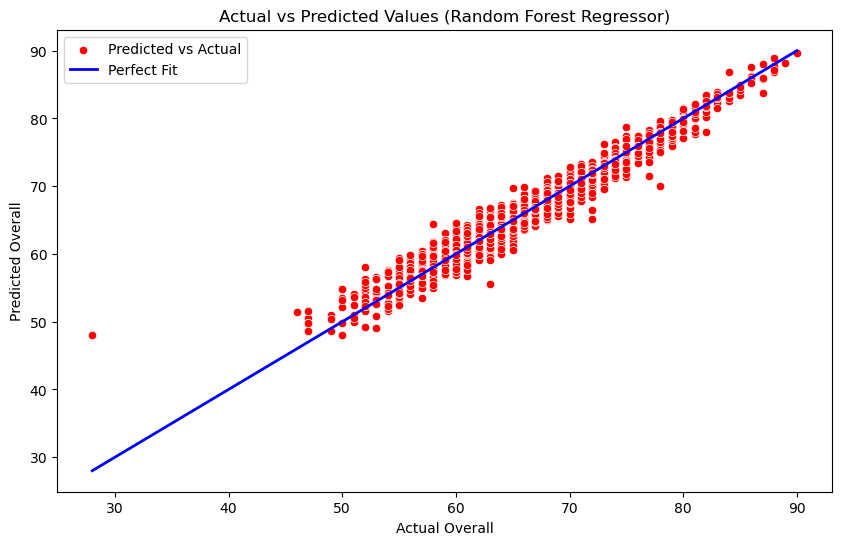

In [91]:
# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='Red', label='Predicted vs Actual')

# Plot a diagonal line representing perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', lw=2, label='Perfect Fit')

# Set labels and title
plt.title('Actual vs Predicted Values (Random Forest Regressor)')
plt.xlabel('Actual Overall')
plt.ylabel('Predicted Overall')
plt.legend()
plt.show()

# DECISION TREE

In [92]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
import time
import math

# Custom scoring function for RMSE (Root Mean Squared Error)
def rmse_scorer(y_true, y_pred):
    return math.sqrt(mean_squared_error(y_true, y_pred))

# Create the RMSE scorer
scorer = make_scorer(rmse_scorer, greater_is_better=False)

# Initialize the DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=7)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [5, 10, 20, 25],
    'min_samples_split': [10, 15, 20, 30]
}

# 5-fold cross-validation has been used with RMSE scoring
dt_grid_search = GridSearchCV(dtr, param_grid, cv=5,
                              scoring=scorer,  # Use custom RMSE scorer
                              return_train_score=True, verbose=2, 
                              n_jobs=-1) # Use all available CPU cores

# Measure the time taken for training
start = time.time()

# Fit the model with training data
dt_grid_search.fit(X_train, y_train)  # Ensure X_train and y_train are defined

end = time.time() - start
print(f"Took {end} seconds")

# Print best parameters and best score (negative RMSE)
print("Best parameters found: ", dt_grid_search.best_params_)
print("Best score (negative RMSE): ", dt_grid_search.best_score_)

# Get the best estimator
best_dtr = dt_grid_search.best_estimator_

# Predictions and evaluation on the test set
y_pred = best_dtr.predict(X_test)

# Calculate the RMSE on the test set
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

print(f"Test RMSE: {rmse}")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Took 2.3564453125 seconds
Best parameters found:  {'max_depth': 20, 'min_samples_split': 30}
Best score (negative RMSE):  -1.7057624810101306
Test RMSE: 1.7137929818938564


In [93]:
# Creating a DataFrame to show variations in scores of train and validation sets with different hyperparameters
cv_results = pd.DataFrame(dt_grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]

# Convert negative RMSE values to positive
cv_results['mean_train_score'] = cv_results['mean_train_score']
cv_results['mean_test_score'] = cv_results['mean_test_score']

# Calculate the difference percentage between train and test scores
cv_results["diff, %"] = 100 * (cv_results["mean_train_score"] - cv_results["mean_test_score"]) / cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending=False)

params  mean_train_score  \
11  {'max_depth': 20, 'min_samples_split': 30}         -1.100355   
15  {'max_depth': 25, 'min_samples_split': 30}         -1.100355   
7   {'max_depth': 10, 'min_samples_split': 30}         -1.305205   
6   {'max_depth': 10, 'min_samples_split': 20}         -1.248047   
5   {'max_depth': 10, 'min_samples_split': 15}         -1.216041   
14  {'max_depth': 25, 'min_samples_split': 20}         -0.932487   
10  {'max_depth': 20, 'min_samples_split': 20}         -0.932671   
4   {'max_depth': 10, 'min_samples_split': 10}         -1.182602   
13  {'max_depth': 25, 'min_samples_split': 15}         -0.805677   
9   {'max_depth': 20, 'min_samples_split': 15}         -0.805814   
8   {'max_depth': 20, 'min_samples_split': 10}         -0.615639   
12  {'max_depth': 25, 'min_samples_split': 10}         -0.615328   
0    {'max_depth': 5, 'min_samples_split': 10}         -2.390882   
1    {'max_depth': 5, 'min_samples_split': 15}         -2.390882   
2    {'max_depth': 5, 'min_samples_split': 20}         -2.390882   
3    {'max_depth': 5, 'min_samples_split': 30}         -2.390882   

    mean_test_score     diff, %  
11        -1.705762  -55.019225  
15        -1.705762  -55.019225  
7         -1.710974  -31.088497  
6         -1.720043  -37.818794  
5         -1.731096  -42.355005  
14        -1.734111  -85.966309  
10        -1.735729  -86.103130  
4         -1.741187  -47.233643  
13        -1.762027 -118.701349  
9         -1.769324 -119.569935  
8         -1.806599 -193.451201  
12        -1.812848 -194.614874  
0         -2.442399   -2.154762  
1         -2.442399   -2.154762  
2         -2.442399   -2.154762  
3         -2.442399   -2.154762

In [94]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Using the best hyperparameters from the GridSearchCV to predict the test set
best_dtr = dt_grid_search.best_estimator_  # Use the best regressor found by GridSearchCV
y_pred = best_dtr.predict(X_test)

# Measuring regression metrics: MSE, MAE, and R²
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Decision Tree Regressor:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

Decision Tree Regressor:
Mean Squared Error (MSE): 2.9370863847886364
Root Mean Squared Error (RMSE): 1.7137929818938564
Mean Absolute Error (MAE): 1.0894239471676104
R² Score: 0.9272259469336996


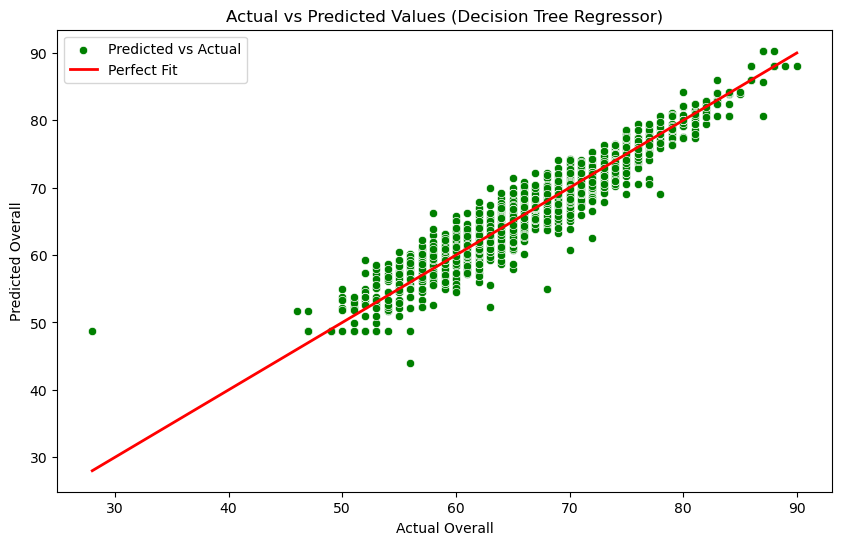

In [95]:
# Create a scatter plot of actual vs predicted values for Decision Tree Regressor
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='Green', label='Predicted vs Actual')

# Plot a diagonal line representing perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Perfect Fit')

# Set labels and title
plt.title('Actual vs Predicted Values (Decision Tree Regressor)')
plt.xlabel('Actual Overall')
plt.ylabel('Predicted Overall')
plt.legend()
plt.show()

# SUPPORT VECTOR MACHINE

In [96]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
import time
import math

# Custom scoring function for RMSE (Root Mean Squared Error)
def rmse_scorer(y_true, y_pred):
    return math.sqrt(mean_squared_error(y_true, y_pred))

# Create the RMSE scorer for GridSearchCV
scorer = make_scorer(rmse_scorer, greater_is_better=False)

# Initialize the SVR model
svr = SVR(kernel='rbf')

# Specify the hyperparameters and their values
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization parameter
    'gamma': ["auto", 0.1],  # Kernel coefficient
}

# 5-fold cross-validation for SVR with RMSE scoring
svr_grid_search = GridSearchCV(svr, param_grid, cv=5, scoring=scorer, return_train_score=True, verbose=2, 
                               n_jobs=-1) # Use all available CPU cores

start = time.time()
svr_grid_search.fit(X_train, y_train)  # Ensure X_train and y_train are defined
end = time.time() - start
print(f"Took {end} seconds")

# Print best parameters and best score (negative RMSE)
print("Best parameters found: ", svr_grid_search.best_params_)
print("Best score (negative RMSE): ", svr_grid_search.best_score_)

# Get the best estimator
best_svr = svr_grid_search.best_estimator_

# Predictions and evaluation on the test set
y_pred = best_svr.predict(X_test)

# Calculate the RMSE on the test set
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

print(f"Test RMSE: {rmse}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Took 339.9077067375183 seconds
Best parameters found:  {'C': 10, 'gamma': 'auto'}
Best score (negative RMSE):  -0.9419248464177186
Test RMSE: 1.026257583582593


In [97]:
# Creating a DataFrame to show variations in scores of train and validation sets with different hyperparameters
cv_results = pd.DataFrame(svr_grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]

# Convert negative RMSE values to positive
cv_results['mean_train_score'] = cv_results['mean_train_score']
cv_results['mean_test_score'] = cv_results['mean_test_score']

# Calculate the difference percentage between train and test scores
cv_results["diff, %"] = 100 * (cv_results["mean_train_score"] - cv_results["mean_test_score"]) / cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending=False)

params  mean_train_score  mean_test_score     diff, %
6    {'C': 10, 'gamma': 'auto'}         -0.650327        -0.941925  -44.838701
4     {'C': 1, 'gamma': 'auto'}         -1.120182        -1.215310   -8.492200
7       {'C': 10, 'gamma': 0.1}         -0.327875        -1.564320 -377.108758
2   {'C': 0.1, 'gamma': 'auto'}         -2.078577        -2.101426   -1.099281
5        {'C': 1, 'gamma': 0.1}         -1.830890        -2.156381  -17.777712
3      {'C': 0.1, 'gamma': 0.1}         -3.625847        -3.677759   -1.431707
0  {'C': 0.01, 'gamma': 'auto'}         -4.067693        -4.071437   -0.092039
1     {'C': 0.01, 'gamma': 0.1}         -5.661352        -5.668115   -0.119464

In [98]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Using the best hyperparameters from the GridSearchCV to predict the test set
best_svr = svr_grid_search.best_estimator_  # Use the best regressor found by GridSearchCV
y_pred = best_svr.predict(X_test)

# Measuring regression metrics: MSE, MAE, and R²
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Support Vector Regressor:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

Support Vector Regressor:
Mean Squared Error (MSE): 1.0532046278607827
Root Mean Squared Error (RMSE): 1.026257583582593
Mean Absolute Error (MAE): 0.6338804277125898
R² Score: 0.97390408063087


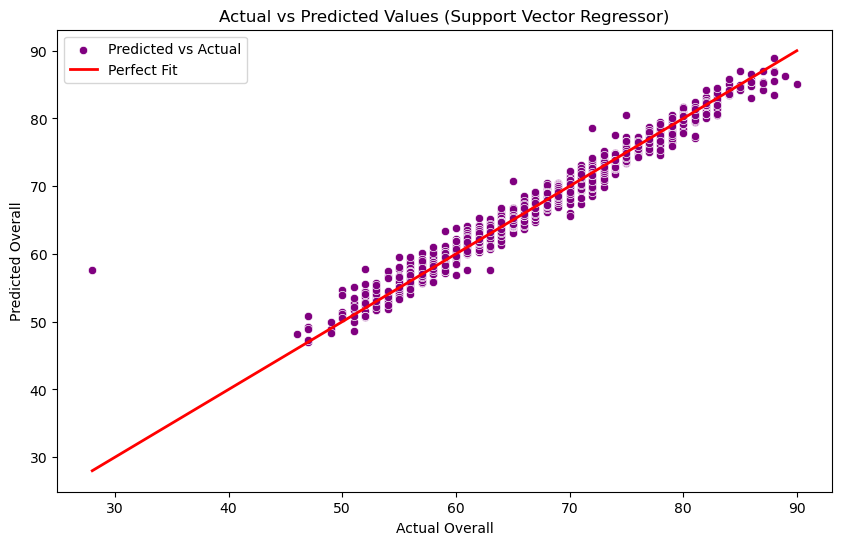

In [99]:
# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='Purple', label='Predicted vs Actual')

# Plot a diagonal line representing perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Perfect Fit')

# Set labels and title
plt.title('Actual vs Predicted Values (Support Vector Regressor)')
plt.xlabel('Actual Overall')
plt.ylabel('Predicted Overall')
plt.legend()
plt.show()

# Predicted Values of Test Set based on the top performing Model

In [100]:
# Using the best SVR model found by GridSearchCV to predict values
best_svr = svr_grid_search.best_estimator_  # This is the best SVR model after tuning

# Predict on the test set (X_test)
y_pred_svr = best_svr.predict(X_test)

# Print or return the predicted values
print("Test_set Predictive Overall:")
print(y_pred_svr)

predictions_df = pd.DataFrame({
    'Actual': y_test,  # Replace with your actual test set labels
    'Predicted': y_pred_svr
})

# Display the predictions DataFrame
print(predictions_df)

Test_set Predictive Overall:
[75.56572041 63.94735055 67.81191869 ... 59.51493797 76.58458899
 71.71606403]
      Actual  Predicted
0         76  75.565720
1         63  63.947351
2         70  67.811919
3         65  64.359304
4         52  54.431317
...      ...        ...
3337      72  71.755107
3338      82  80.724438
3339      59  59.514938
3340      76  76.584589
3341      72  71.716064

[3342 rows x 2 columns]


# Predicted Values of Train Set based on the top performing Model

In [101]:
# Using the best SVR model found by GridSearchCV to predict values
best_svr = svr_grid_search.best_estimator_  # This is the best SVR model after tuning

# Predict on the train set (X_train)
y_pred_train_svr = best_svr.predict(X_train)

# Print or return the predicted values for the train set
print("Train_set Predictive Overall:")
print(y_pred_train_svr)

# Create a DataFrame to compare actual vs predicted for the train set
train_predictions_df = pd.DataFrame({
    'Actual': y_train,  # Actual labels for the train set
    'Predicted': y_pred_train_svr
})

# Display the train predictions DataFrame
print(train_predictions_df)


Train_set Predictive Overall:
[77.45402379 75.89991033 72.93579016 ... 79.10032799 72.67704617
 62.90017693]
       Actual  Predicted
0          77  77.454024
1          76  75.899910
2          73  72.935790
3          67  66.905439
4          63  63.375156
...       ...        ...
13363      72  72.100133
13364      60  60.100350
13365      79  79.100328
13366      73  72.677046
13367      63  62.900177

[13368 rows x 2 columns]


# Prediction on Both sets after combining Train and Test set to Predict Overall of all the players

In [102]:
# Step 4: Use the best SVR model found by GridSearchCV to predict values on both train and test sets
best_svr = svr_grid_search.best_estimator_

# Predict on the train and test sets
y_pred_train = best_svr.predict(X_train)
y_pred_test = best_svr.predict(X_test)

# Combine predicted values for both train and test sets
X_combined = pd.concat([X_train, X_test], axis=0)
y_pred_combined = np.concatenate([y_pred_train, y_pred_test])

# Step 5: Restore the original indices and ensure correct order after prediction
combined_original_indices = pd.concat([train_set['Original Index'], test_set['Original Index']], axis=0)
predicted_df = pd.DataFrame({
    'Original Index': combined_original_indices,
    'Predicted Overall': y_pred_combined
})

# Step 6: Sort the predicted_df by 'Original Index' to align with the original dataset order
predicted_df_sorted = predicted_df.sort_values(by='Original Index').reset_index(drop=True)


# Load the original dataset that contains 'Name', 'Club', 'Position', etc.
file_path = r'C:\Users\Yash\Desktop\Research Project\FIFA 22 FINAL FILE(Cleaned data with OG Index).csv'
df_before_split = pd.read_csv(file_path)

# Step 7: Join the predicted values with the original dataset (sorted by 'Original Index')
final_df = df_before_split[['Name', 'Club', 'Position', 'Overall']].join(predicted_df_sorted['Predicted Overall'])

# Display the first few rows of the final DataFrame
print(final_df.head())

              Name                 Club Position  Overall  Predicted Overall
0  Bruno Fernandes    Manchester United      CAM       88          87.666627
1      L. Goretzka   FC Bayern MÃ¼nchen       CM       87          87.099988
2       L. SuÃ¡rez  AtlÃ©tico de Madrid       CF       88          88.922819
3     K. De Bruyne      Manchester City       CM       91          90.588701
4        M. AcuÃ±a           Sevilla FC       LB       84          83.937940


Feature Importance based on Permutation Importance:
                          Importance
Potential                   0.317195
Original Index              0.181168
Age                         0.162740
BallControl                 0.049069
Interceptions               0.045985
Reactions                   0.037841
Finishing                   0.032943
Dribbling                   0.032339
Positioning                 0.029675
Skill Moves                 0.028261
ShotPower                   0.026866
ShortPassing                0.026517
Crossing                    0.023259
HeadingAccuracy             0.018175
DefensiveAwareness          0.017331
Composure                   0.013013
Stamina                     0.012242
Volleys                     0.011370
International Reputation    0.010372
LongShots                   0.010045
Acceleration                0.009878
SprintSpeed                 0.009742
Vision                      0.009355
Strength                    0.008221
Aggression             

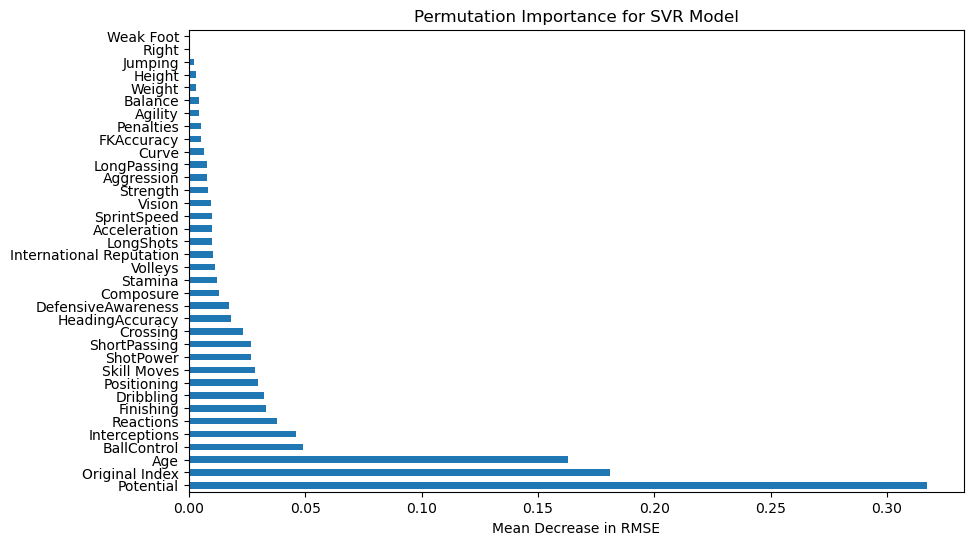

In [110]:
from sklearn.inspection import permutation_importance

# Fit the best SVR model (if not already done)
best_svr.fit(X_train, y_train)

# Calculate permutation importance on the test set
perm_importance = permutation_importance(best_svr, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Create a DataFrame to display feature importance
import pandas as pd
features = X_train.columns  # Assuming X_train is a DataFrame
importance_df = pd.DataFrame(perm_importance.importances_mean, index=features, columns=["Importance"])

# Sort by importance
importance_df = importance_df.sort_values(by="Importance", ascending=False)
print("Feature Importance based on Permutation Importance:")
print(importance_df)

# Optional: Plot the feature importance
import matplotlib.pyplot as plt
importance_df.plot(kind='barh', figsize=(10, 6), legend=None)
plt.title("Permutation Importance for SVR Model")
plt.xlabel("Mean Decrease in RMSE")
plt.show()


In [103]:
# Specify the file path where you want to save the final DataFrame
save_file_path = r'C:\Users\Yash\Desktop\Research Project\Final_Predicted_FIFA_Overall.csv'

# Save the final DataFrame to a CSV file
final_df.to_csv(save_file_path, index=False)

print(f"File successfully saved at: {save_file_path}")

File successfully saved at: C:\Users\Yash\Desktop\Research Project\Final_Predicted_FIFA_Overall.csv


# k-nearest neighbors (KNN)

In [104]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
import time
import math

# Custom scoring function for RMSE (Root Mean Squared Error)
def rmse_scorer(y_true, y_pred):
    return math.sqrt(mean_squared_error(y_true, y_pred))

# Create the RMSE scorer for GridSearchCV
scorer = make_scorer(rmse_scorer, greater_is_better=False)

# Initialize the KNN Regressor model
knn_regressor = KNeighborsRegressor()

# Specify the hyperparameters and their values for KNN Regressor
param_grid = {
    'n_neighbors': [8, 9, 10, 11, 12, 13, 14, 15, 16, 17],  # Number of neighbors to consider
}

# 5-fold cross-validation for KNN Regressor with RMSE scoring
knn_grid_search = GridSearchCV(knn_regressor, param_grid, cv=5, scoring=scorer, return_train_score=True, 
                               verbose=1, n_jobs=-1)  # Use all available CPU cores

start = time.time()
knn_grid_search.fit(X_train, y_train)  # Ensure X_train and y_train are defined
end = time.time() - start
print(f"Took {end} seconds")

# Print best parameters and best score (negative RMSE)
print("Best parameters found: ", knn_grid_search.best_params_)
print("Best score (negative RMSE): ", knn_grid_search.best_score_)

# Get the best estimator
best_knn = knn_grid_search.best_estimator_

# Predictions and evaluation on the test set
y_pred = best_knn.predict(X_test)

# Calculate the RMSE on the test set
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

print(f"Test RMSE: {rmse}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Took 7.180791139602661 seconds
Best parameters found:  {'n_neighbors': 9}
Best score (negative RMSE):  -1.949574434397637
Test RMSE: 1.9261567222470286


In [105]:
# Creating a DataFrame to show variations in scores of train and validation sets with different hyperparameters
cv_results = pd.DataFrame(knn_grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]

# Convert negative RMSE values to positive
cv_results['mean_train_score'] = cv_results['mean_train_score']
cv_results['mean_test_score'] = cv_results['mean_test_score']

# Calculate the difference percentage between train and test scores
cv_results["diff, %"] = 100 * (cv_results["mean_train_score"] - cv_results["mean_test_score"]) / cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending=False)

params  mean_train_score  mean_test_score    diff, %
1   {'n_neighbors': 9}         -1.734176        -1.949574 -12.420784
3  {'n_neighbors': 11}         -1.772024        -1.950531 -10.073655
2  {'n_neighbors': 10}         -1.755204        -1.951779 -11.199523
0   {'n_neighbors': 8}         -1.714037        -1.952950 -13.938614
4  {'n_neighbors': 12}         -1.785752        -1.953175  -9.375514
5  {'n_neighbors': 13}         -1.798946        -1.956233  -8.743298
6  {'n_neighbors': 14}         -1.810749        -1.957287  -8.092686
8  {'n_neighbors': 16}         -1.833591        -1.959580  -6.871165
7  {'n_neighbors': 15}         -1.823178        -1.959920  -7.500235
9  {'n_neighbors': 17}         -1.843906        -1.962674  -6.441085

In [106]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Using the best hyperparameters from the GridSearchCV to predict the test set
best_knn = knn_grid_search.best_estimator_  # Use the best regressor found by GridSearchCV
y_pred = best_knn.predict(X_test)

# Measuring regression metrics: MSE, MAE, and R²
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("KNeighborsRegressor:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

KNeighborsRegressor:
Mean Squared Error (MSE): 3.7100797186574166
Root Mean Squared Error (RMSE): 1.9261567222470286
Mean Absolute Error (MAE): 1.4608684088037769
R² Score: 0.9080730006021904


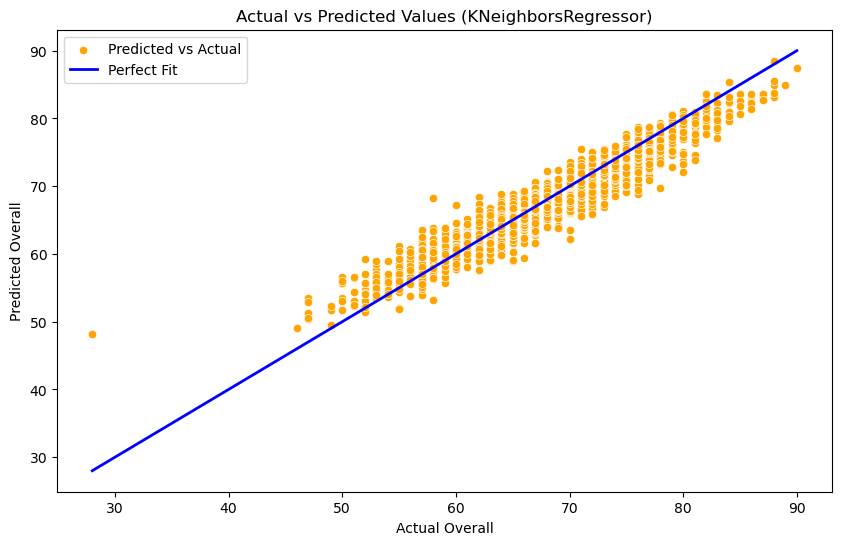

In [107]:
# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='Orange', label='Predicted vs Actual')

# Plot a diagonal line representing perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', lw=2, label='Perfect Fit')

# Set labels and title
plt.title('Actual vs Predicted Values (KNeighborsRegressor)')
plt.xlabel('Actual Overall')
plt.ylabel('Predicted Overall')
plt.legend()
plt.show()

# Model Comparison (RMSE and R²)

In [108]:
from tabulate import tabulate

# Function to evaluate a model and return RMSE and R²
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = math.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return rmse, r2

# List to store the results
model_results = []

# Baseline Model: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
rmse_lr, r2_lr = evaluate_model(lr_model, X_test, y_test)
model_results.append(('Linear Regression', rmse_lr, r2_lr))

# Decision Tree Model (assuming you've already trained it)
rmse_dt, r2_dt = evaluate_model(best_dtr, X_test, y_test)  # Using best_dtr from your Decision Tree code
model_results.append(('Decision Tree', rmse_dt, r2_dt))

# Random Forest Model (assuming you've already trained it)
rmse_rf, r2_rf = evaluate_model(best_rf, X_test, y_test)  # Using best_rf from your Random Forest code
model_results.append(('Random Forest', rmse_rf, r2_rf))

# Support Vector Regression Model (assuming you've already trained it)
rmse_svr, r2_svr = evaluate_model(best_svr, X_test, y_test)  # Using best_svr from your SVR code
model_results.append(('Support Vector Machine (SVR)', rmse_svr, r2_svr))

# KNeighborsRegressor Model (assuming you've already trained it)
rmse_knn, r2_knn = evaluate_model(best_knn, X_test, y_test)  # Using best_knn from your knn code
model_results.append(('k-nearest neighbors', rmse_knn, r2_knn))


# Print the results
print("Model Comparison (RMSE and R²):")
print(tabulate(model_results, headers=["ML Models", "RMSE", "R²"], tablefmt="fancy_grid", floatfmt=".4f"))


Model Comparison (RMSE and R²):
╒══════════════════════════════╤════════╤════════╕
│ ML Models                    │   RMSE │     R² │
╞══════════════════════════════╪════════╪════════╡
│ Linear Regression            │ 1.9224 │ 0.9084 │
├──────────────────────────────┼────────┼────────┤
│ Decision Tree                │ 1.7138 │ 0.9272 │
├──────────────────────────────┼────────┼────────┤
│ Random Forest                │ 1.2120 │ 0.9636 │
├──────────────────────────────┼────────┼────────┤
│ Support Vector Machine (SVR) │ 1.0263 │ 0.9739 │
├──────────────────────────────┼────────┼────────┤
│ k-nearest neighbors          │ 1.9262 │ 0.9081 │
╘══════════════════════════════╧════════╧════════╛


In [109]:
import pandas as pd
import numpy as np

# List to store the results (assuming you already have this from previous steps)
model_results = [
    ('Linear Regression', 1.9224, 0.9084),
    ('Decision Tree', 1.7138 , 0.9272 ),
    ('Random Forest', 1.2120 , 0.9636),
    ('Support Vector Machine', 1.0263, 0.9739),
    ('k-nearest neighbors', 1.9262, 0.9081)
]

# Convert the list of results into a DataFrame
df_results = pd.DataFrame(model_results, columns=["Model", "RMSE", "R²"])

# Set "Model" column as the index to hide the default numerical index
df_results = df_results.set_index("Model")

# Apply background gradient to make the table more presentable
df_results_styled = (df_results.style
                     .background_gradient(subset=['RMSE', 'R²'], cmap='Greens')
                     .format({"RMSE": "{:.4f}", "R²": "{:.4f}"})
                    )

# Display the styled DataFrame (in Jupyter Notebook this will display with the gradient)
df_results_styled
